#IMPORTING SOME LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#Loading Data

In [ ]:
df = pd.read_csv("/content/concrete.csv")

In [ ]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  strength  
0                                              676.0         28     79.99  
1                                              676.0         28     61.89  
2                                              594.0        270     40.27  
3                                              594.0        365     41.05  
4                                              825.5        360     44.30

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64

In [ ]:
df.duplicated().sum()

25

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'strength'],
      dtype='object')

Updated Columns Headers

In [ ]:
import re

# Assuming df is your main DataFrame
df.columns = [re.sub(r' \(.*\)', '', col) for col in df.columns]
columns= df.columns

print(df.columns)


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water ', 'Superplasticizer',
       'Coarse Aggregate ', 'Fine Aggregate', 'Age', 'strength'],
      dtype='object')


In [ ]:
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water   Superplasticizer  \
0   540.0                 0.0      0.0   162.0               2.5   
1   540.0                 0.0      0.0   162.0               2.5   
2   332.5               142.5      0.0   228.0               0.0   
3   332.5               142.5      0.0   228.0               0.0   
4   198.6               132.4      0.0   192.0               0.0   

   Coarse Aggregate   Fine Aggregate  Age  strength  
0             1040.0           676.0   28     79.99  
1             1055.0           676.0   28     61.89  
2              932.0           594.0  270     40.27  
3              932.0           594.0  365     41.05  
4              978.4           825.5  360     44.30

#Now see outliers

In [ ]:

def outlier_graph(columns):
    plt.figure(figsize=(5,3))
    sns.boxplot(df[columns])
    plt.title('{} distribution'.format(columns))

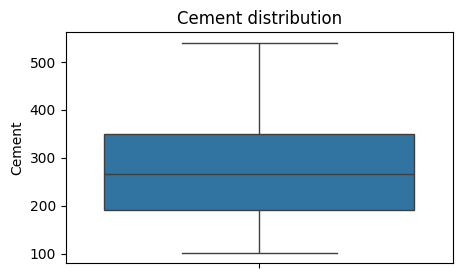

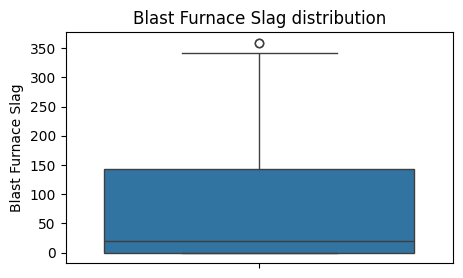

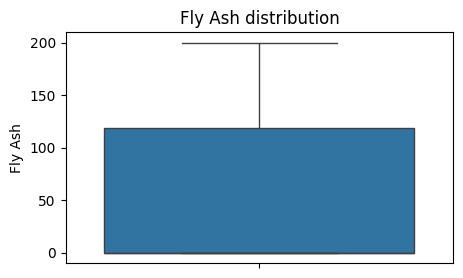

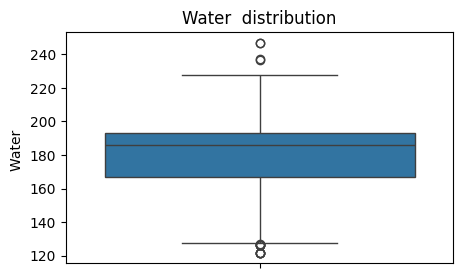

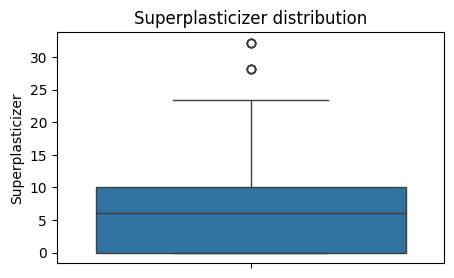

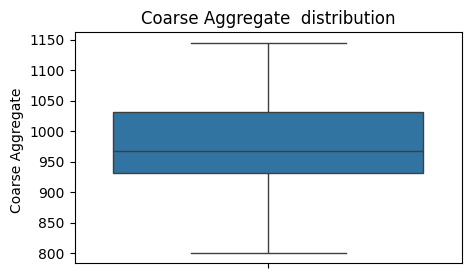

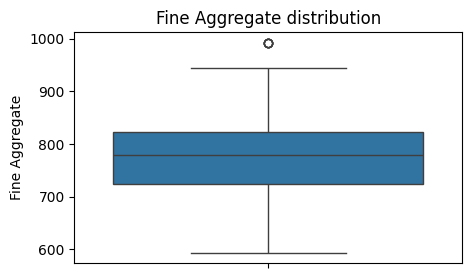

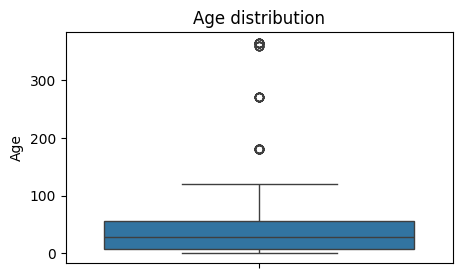

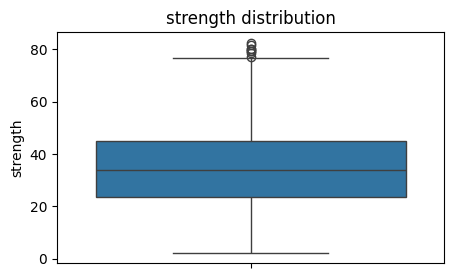

In [ ]:
for i in columns:
    outlier_graph(i)

#Removing outliers involves identifying and excluding data points that significantly deviate from the majority of the dataset to improve accuracy.

In [ ]:
df = df[df['Blast Furnace Slag']<350]
df = df[(df['Water ']<230) & (df['Water ']>130)]
df = df[df['Superplasticizer']<25]
df = df[df['Fine Aggregate']<950]
df = df[df['Age']<100]

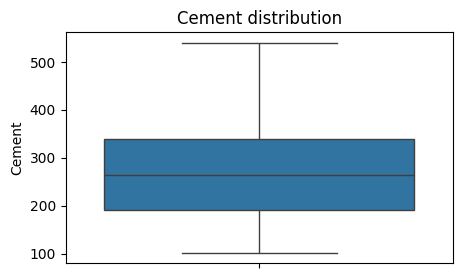

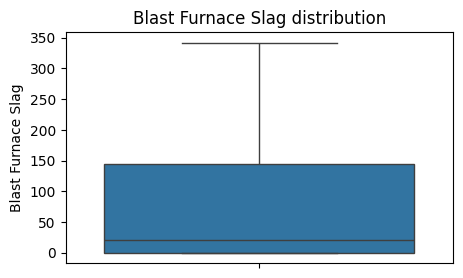

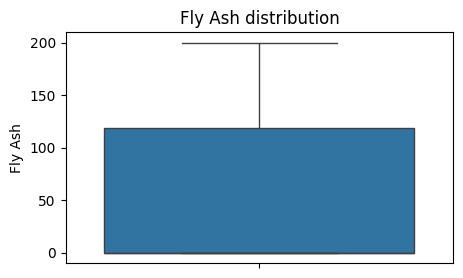

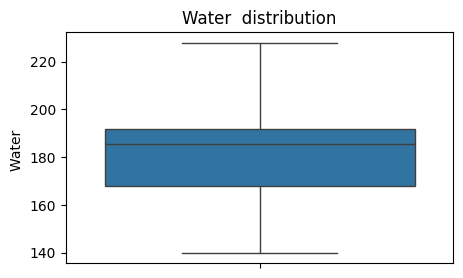

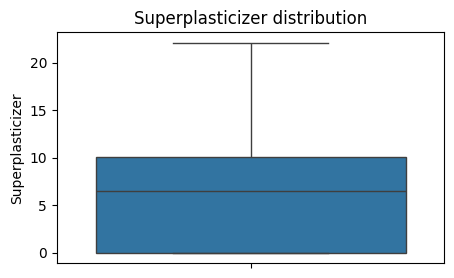

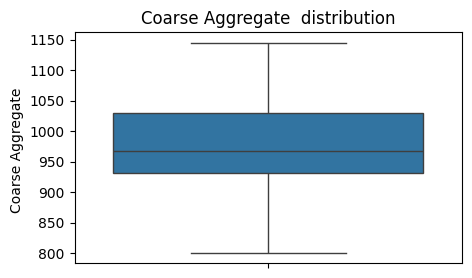

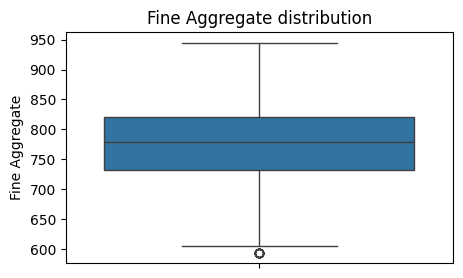

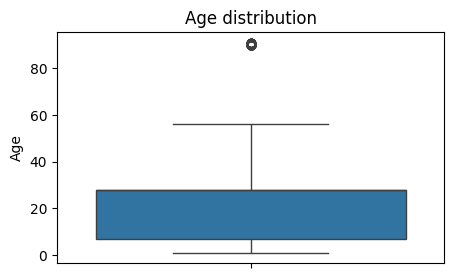

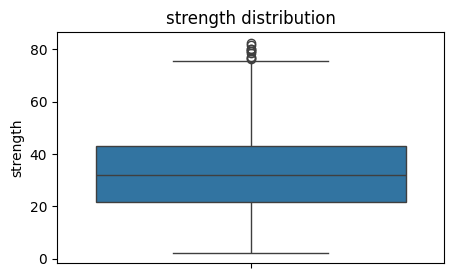

In [ ]:
for i in columns:
    outlier_graph(i)

#Data Visualization

<Axes: >

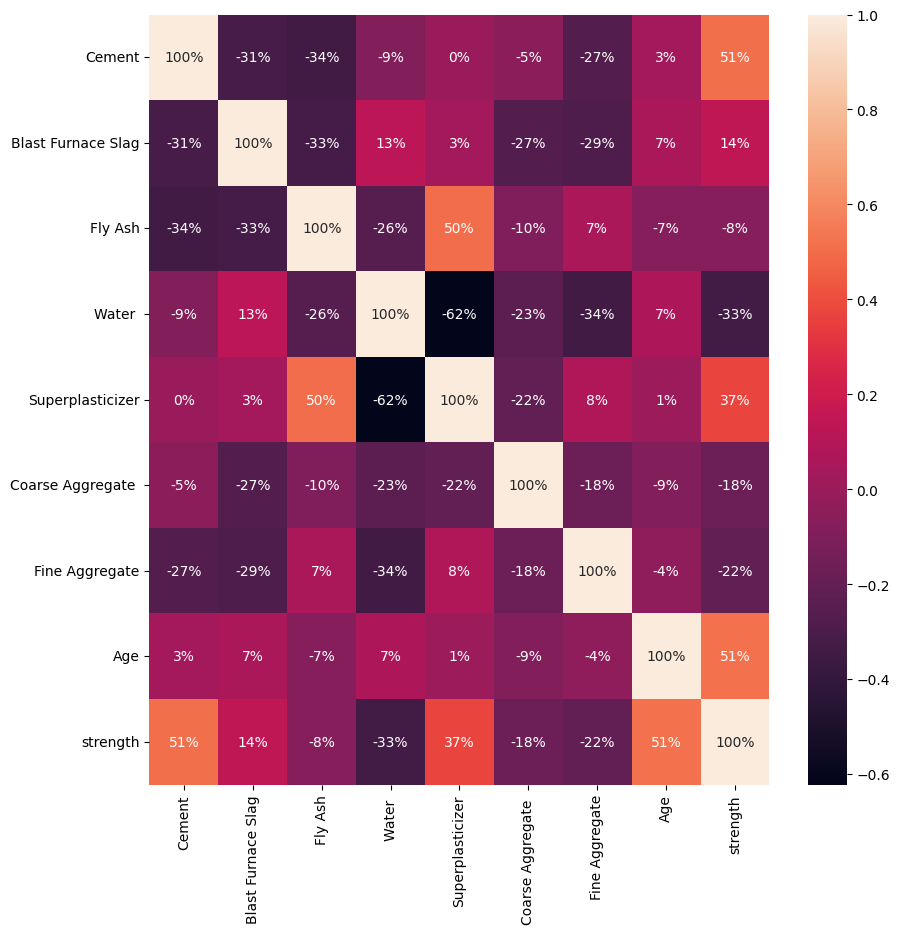

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')


#Fly ash was dropped from consideration due to its very weak correlation with concrete strength.

In [ ]:
df.drop(['Fly Ash'],axis=1,inplace=True)

In [ ]:
df.head()

Cement  Blast Furnace Slag  Water   Superplasticizer  Coarse Aggregate   \
0   540.0                 0.0   162.0               2.5             1040.0   
1   540.0                 0.0   162.0               2.5             1055.0   
5   266.0               114.0   228.0               0.0              932.0   
7   380.0                95.0   228.0               0.0              932.0   
8   266.0               114.0   228.0               0.0              932.0   

   Fine Aggregate  Age  strength  
0           676.0   28     79.99  
1           676.0   28     61.89  
5           670.0   90     47.03  
7           594.0   28     36.45  
8           670.0   28     45.85

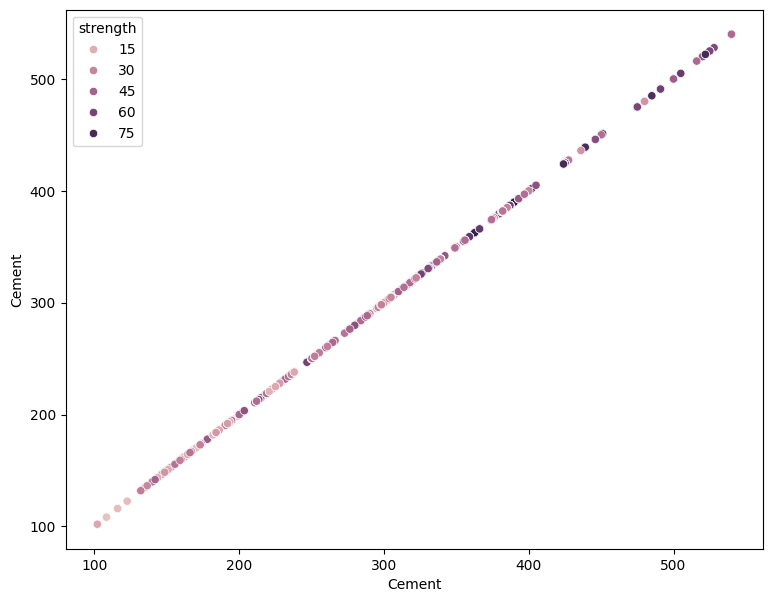

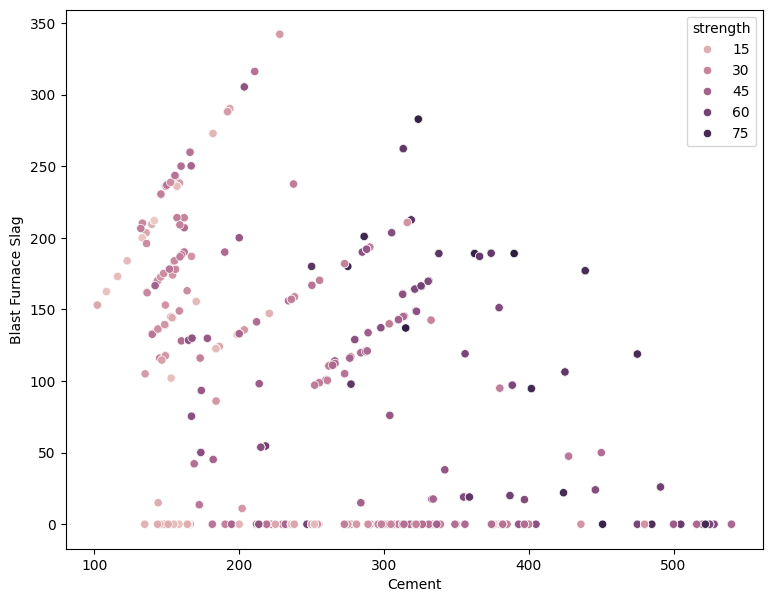

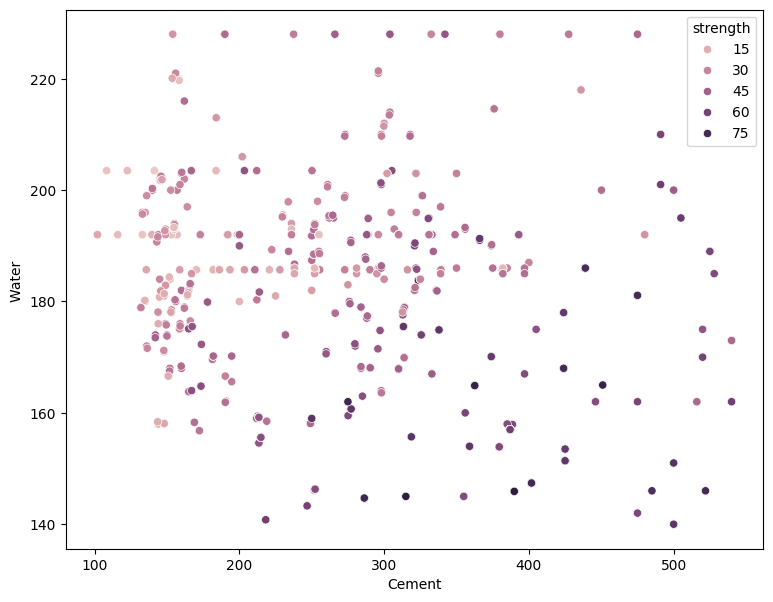

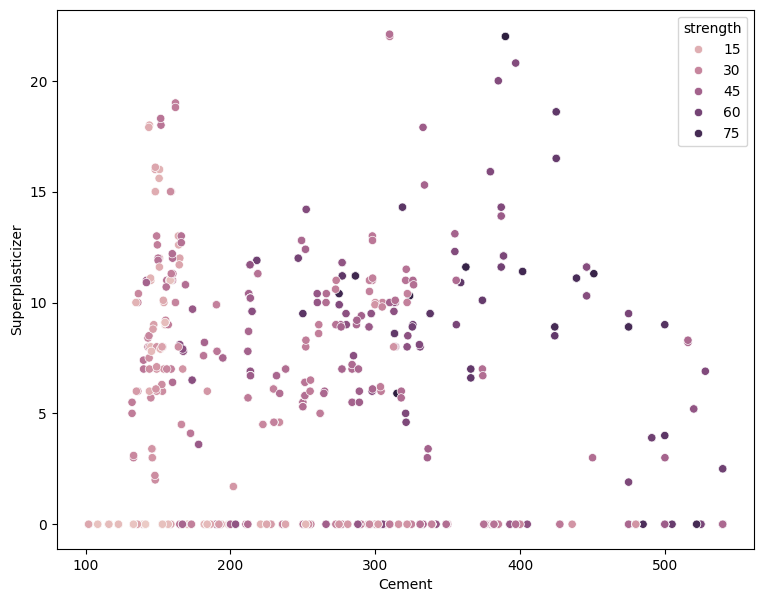

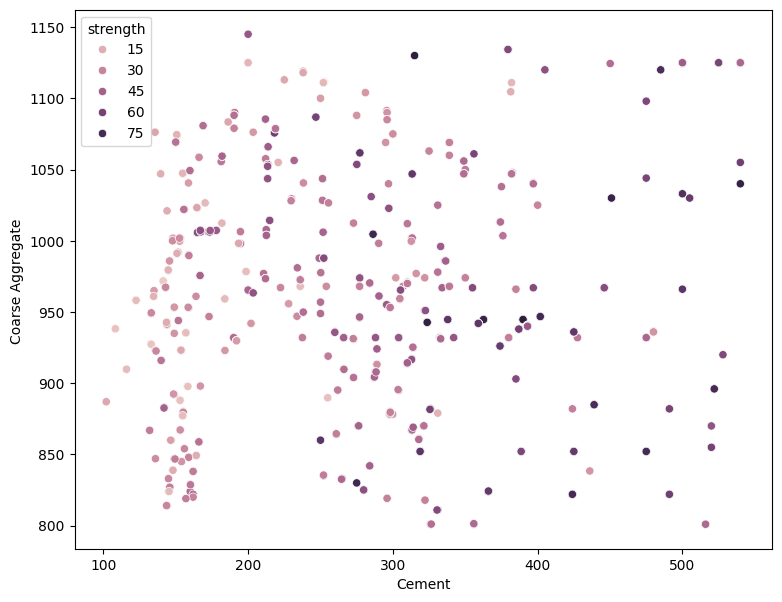

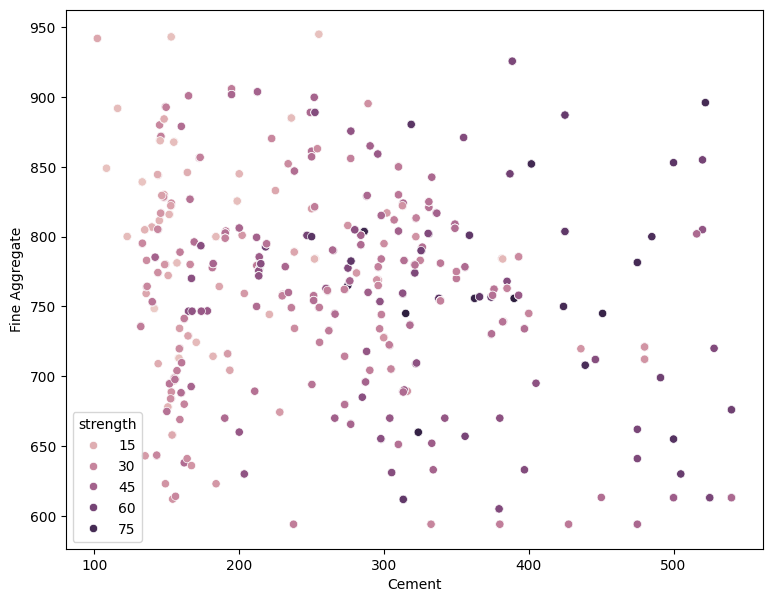

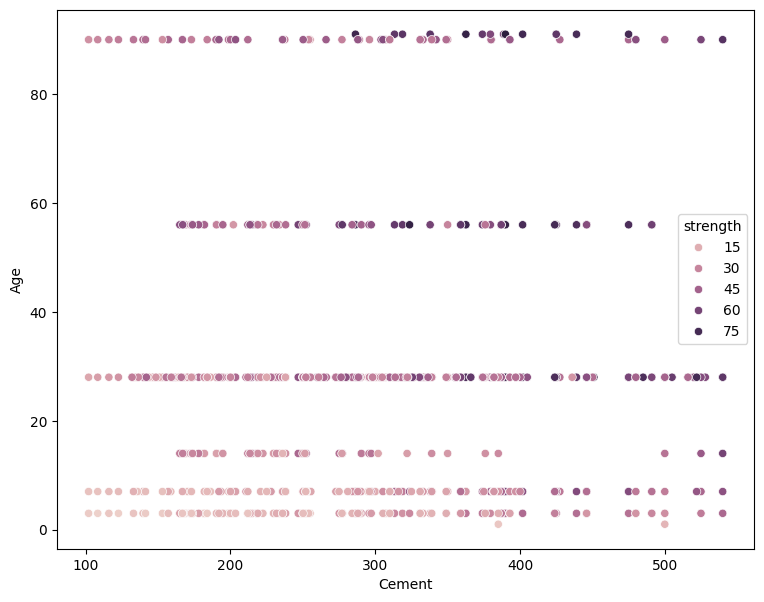

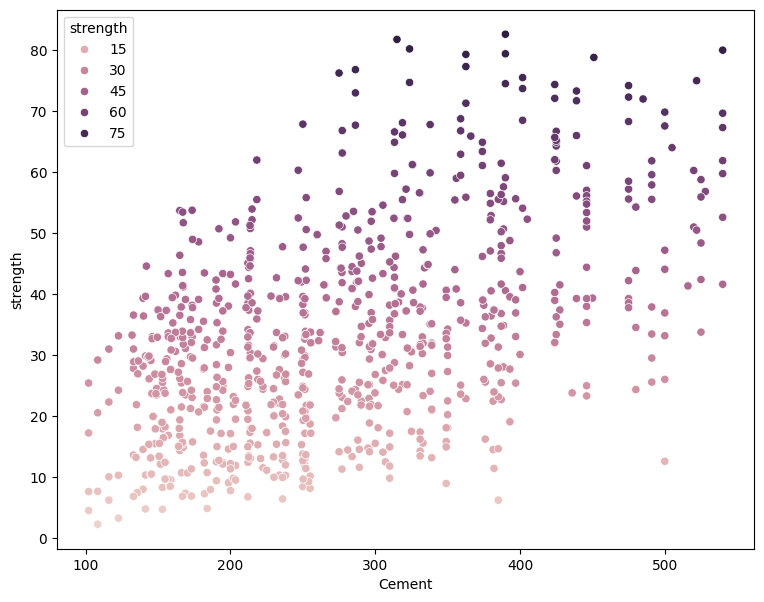

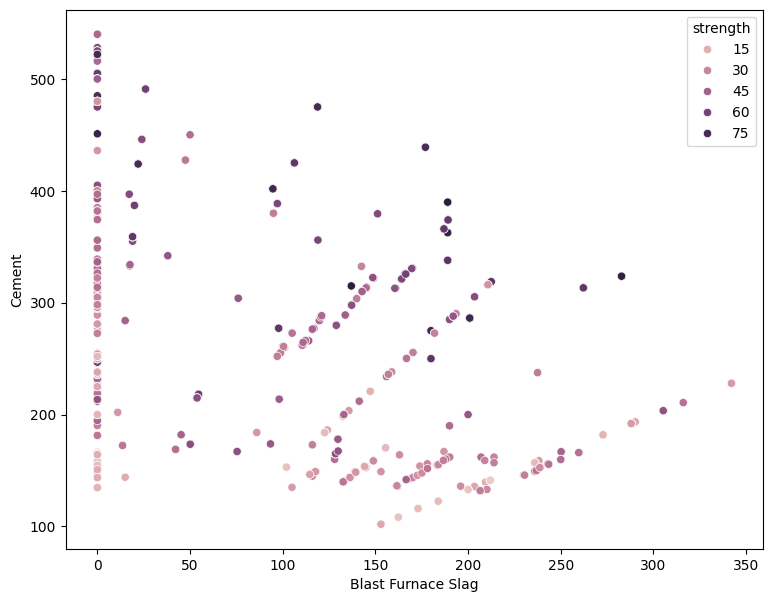

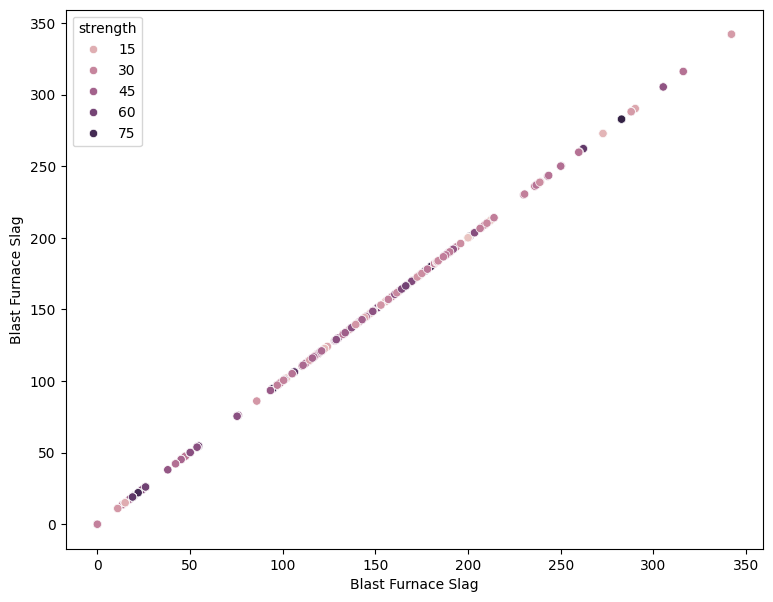

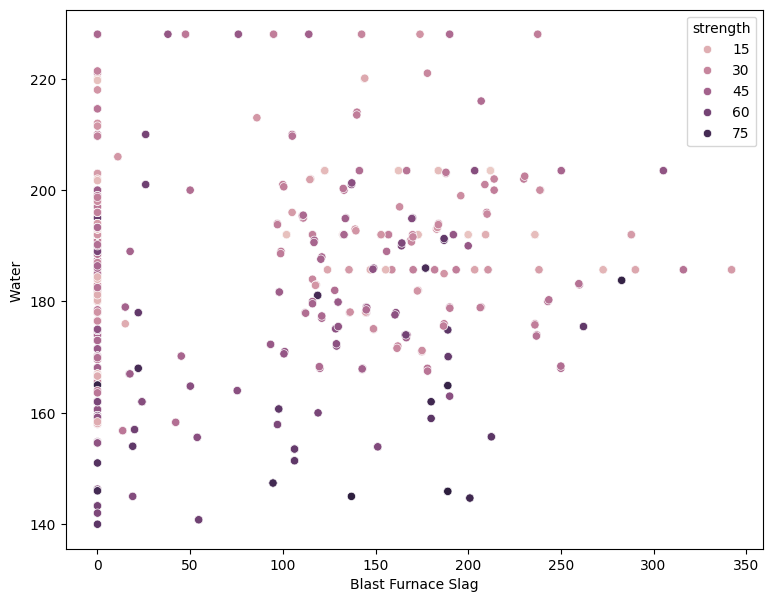

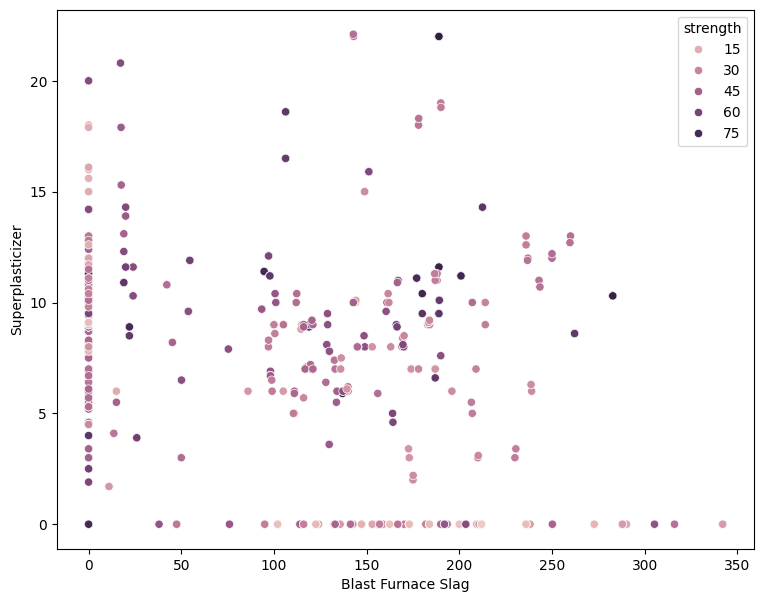

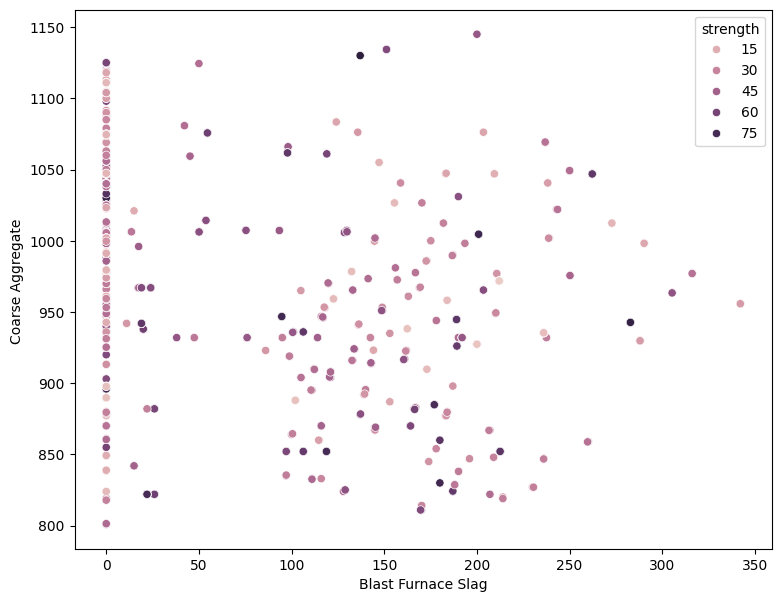

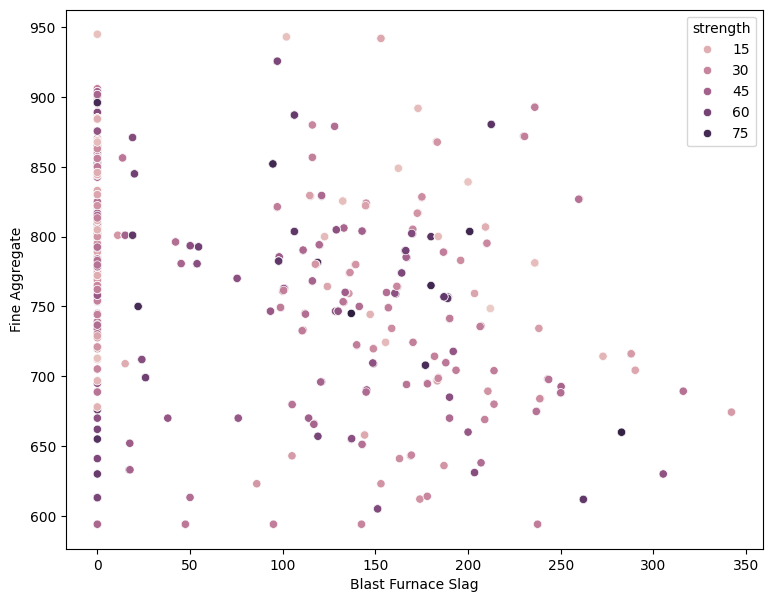

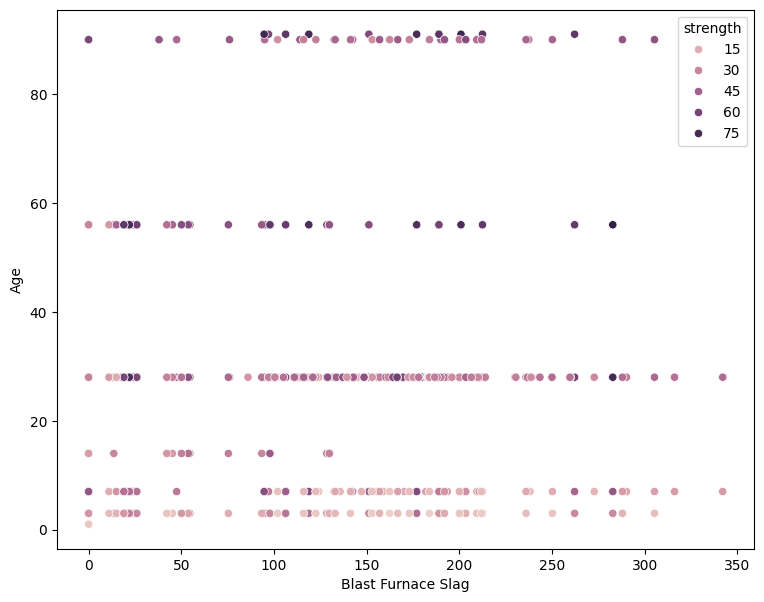

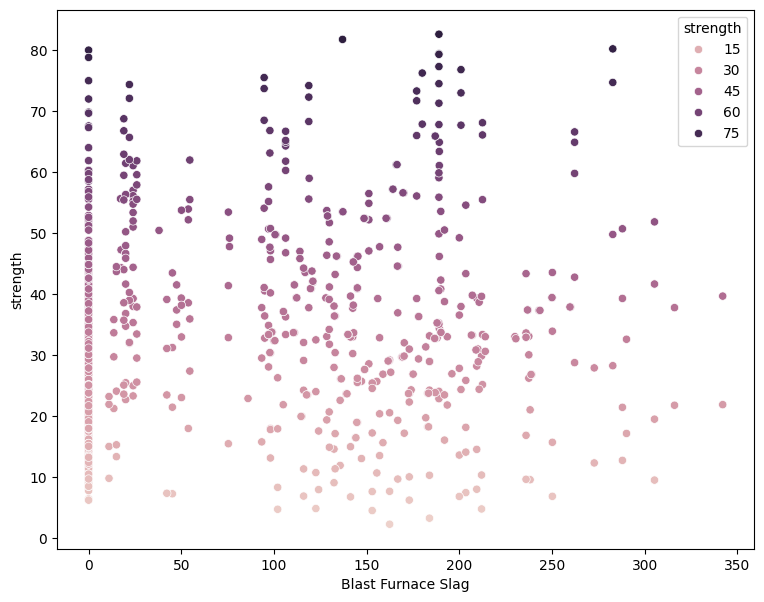

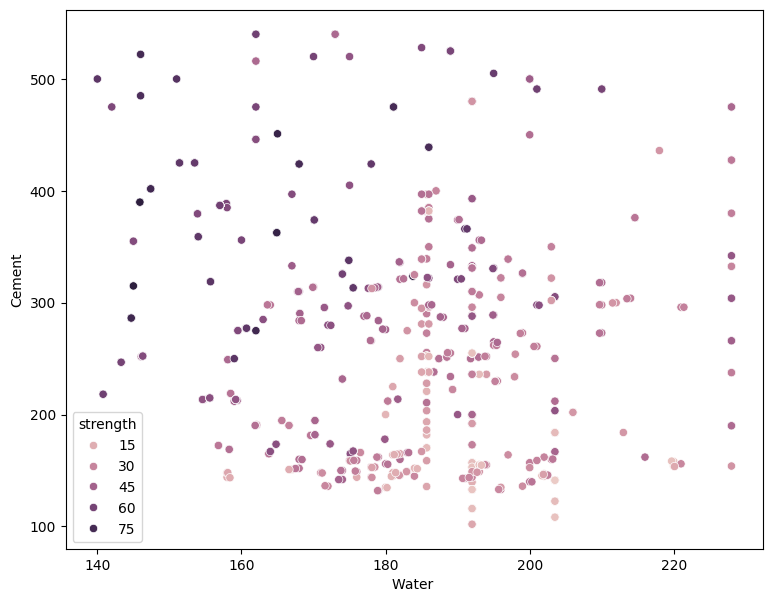

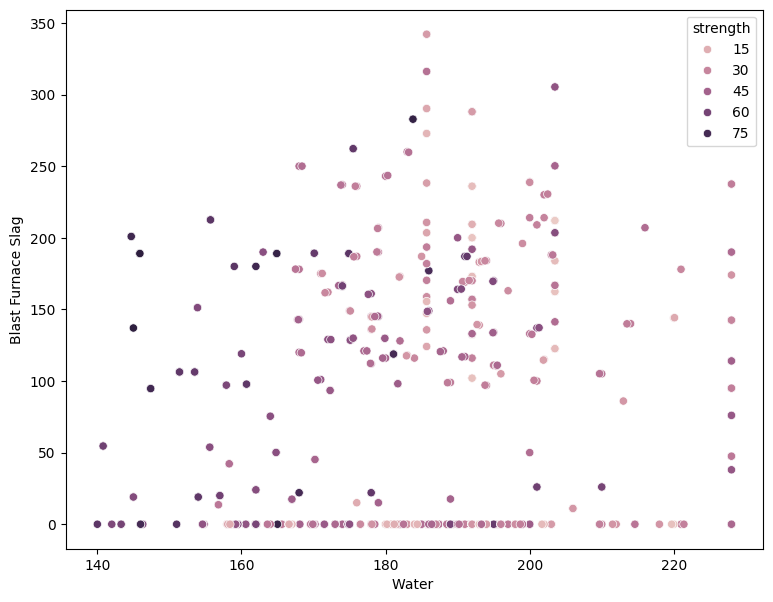

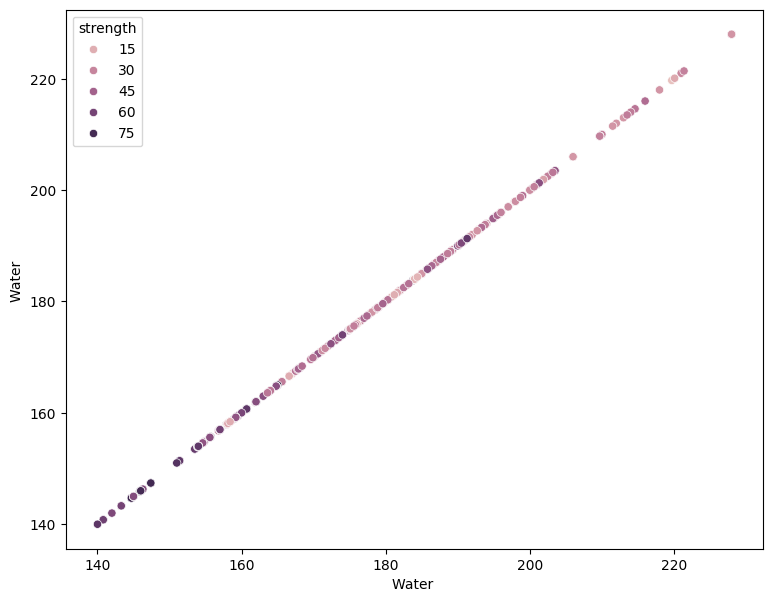

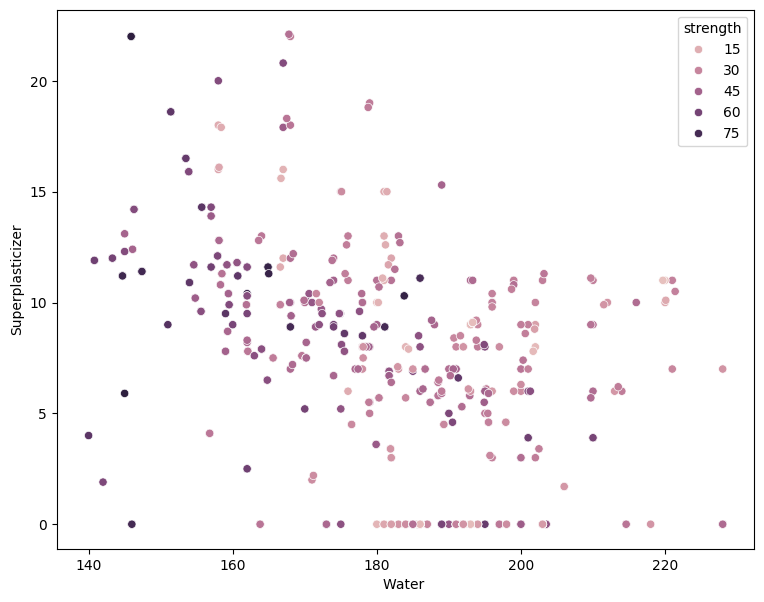

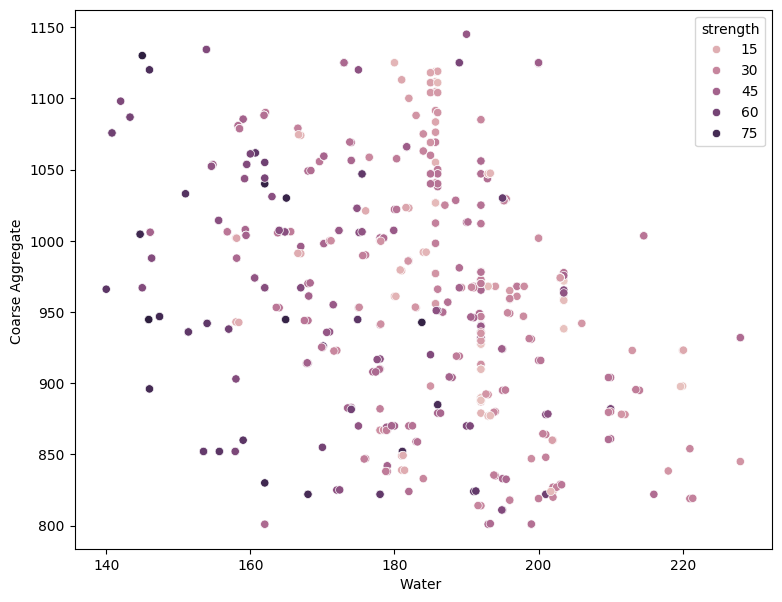

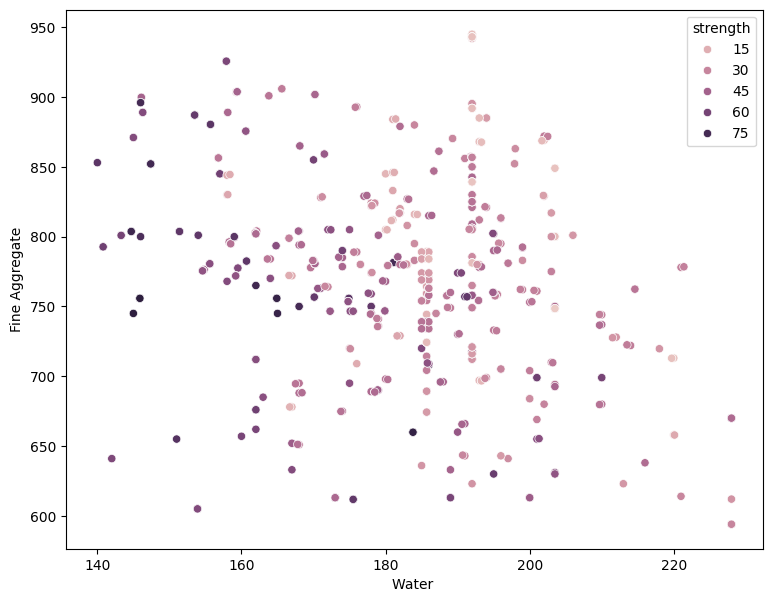

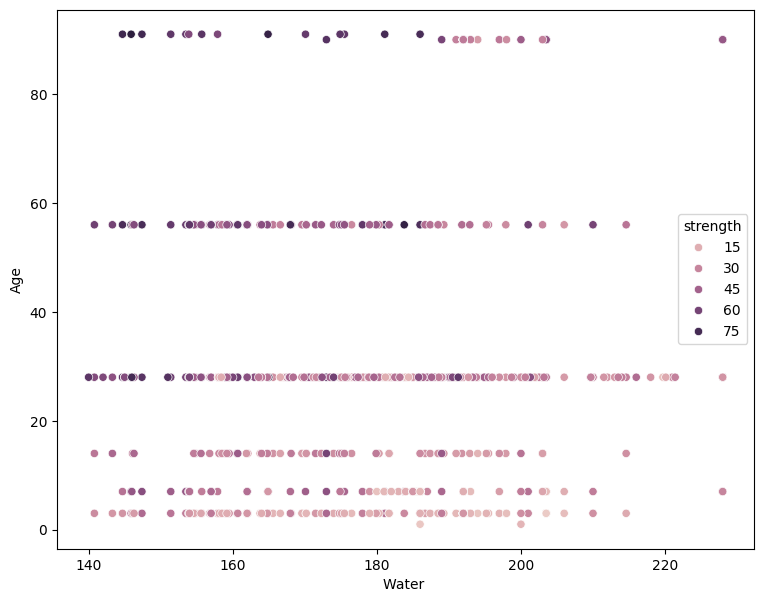

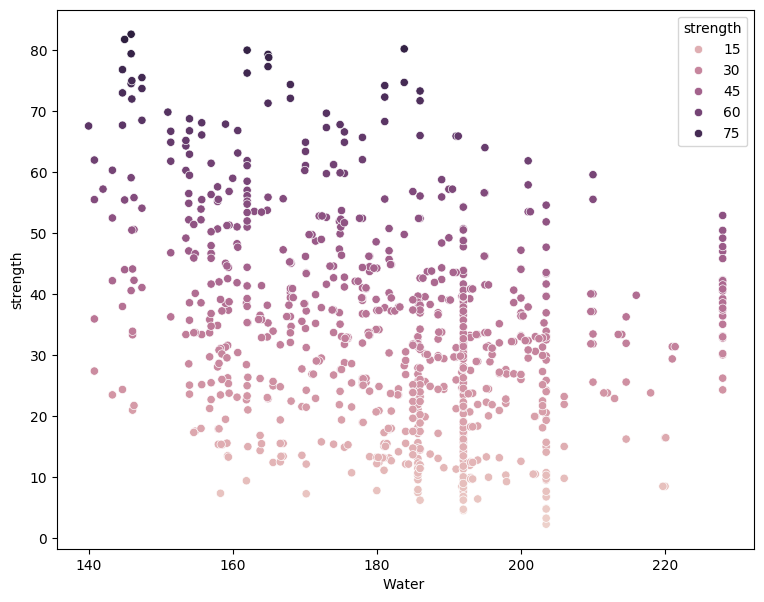

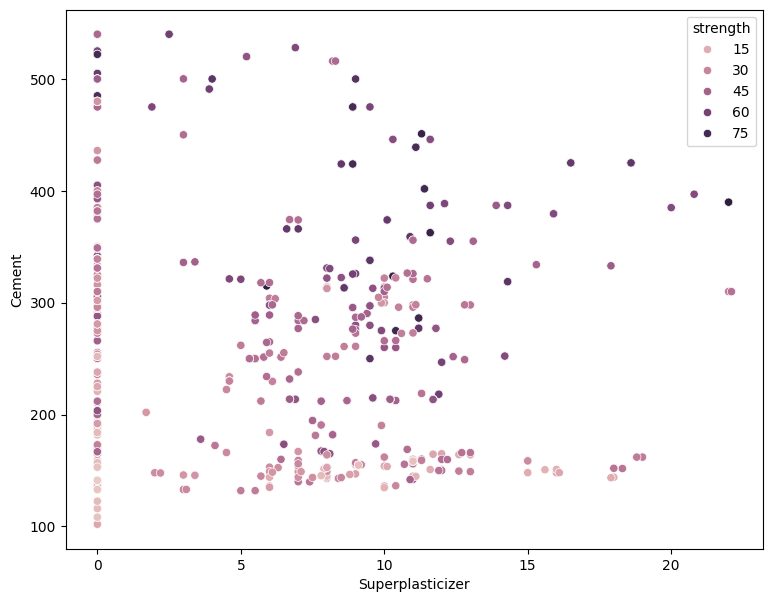

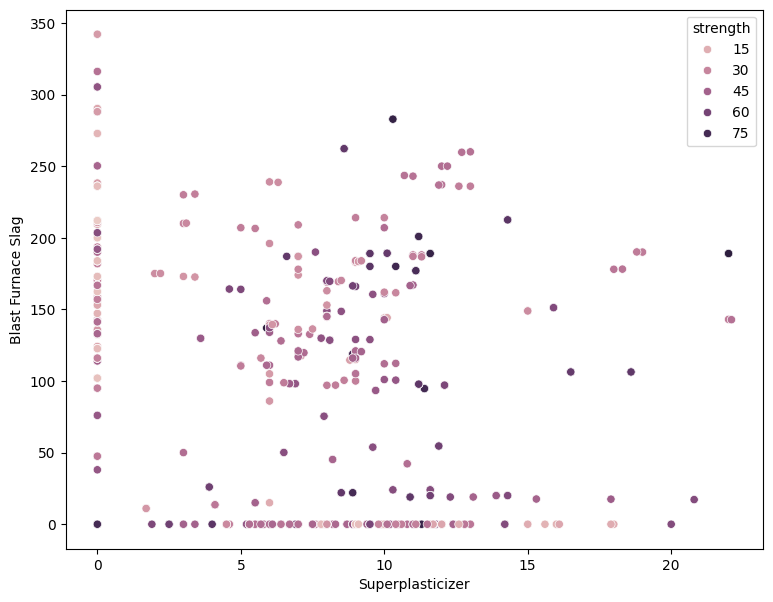

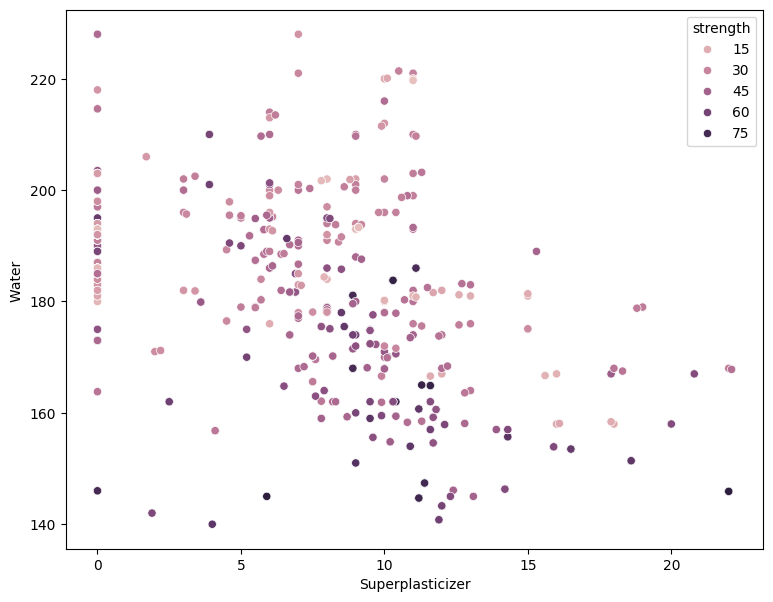

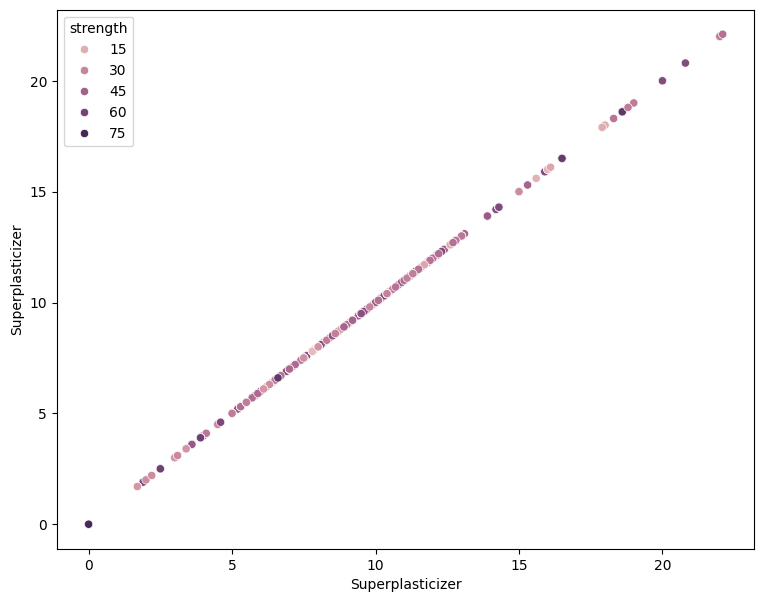

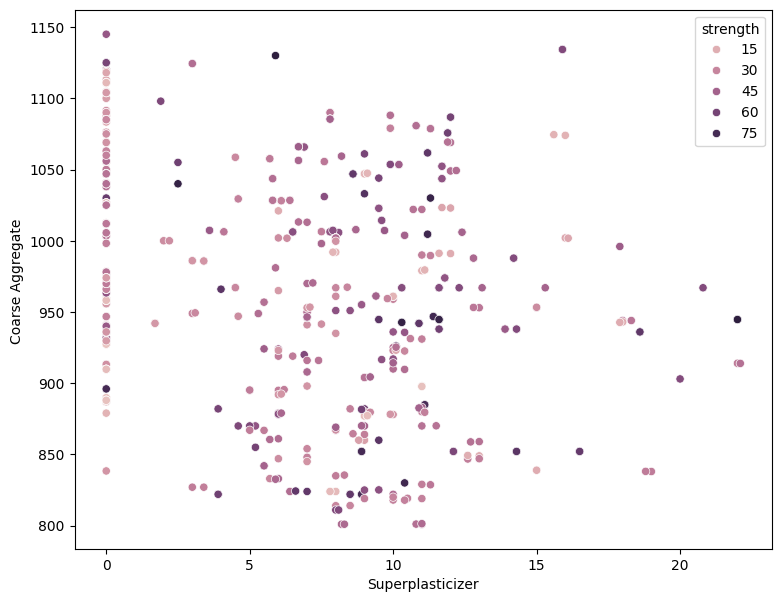

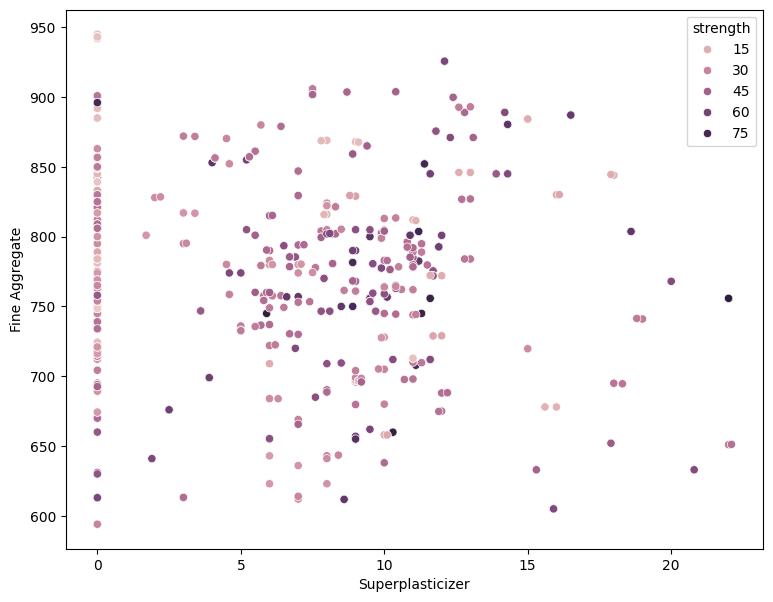

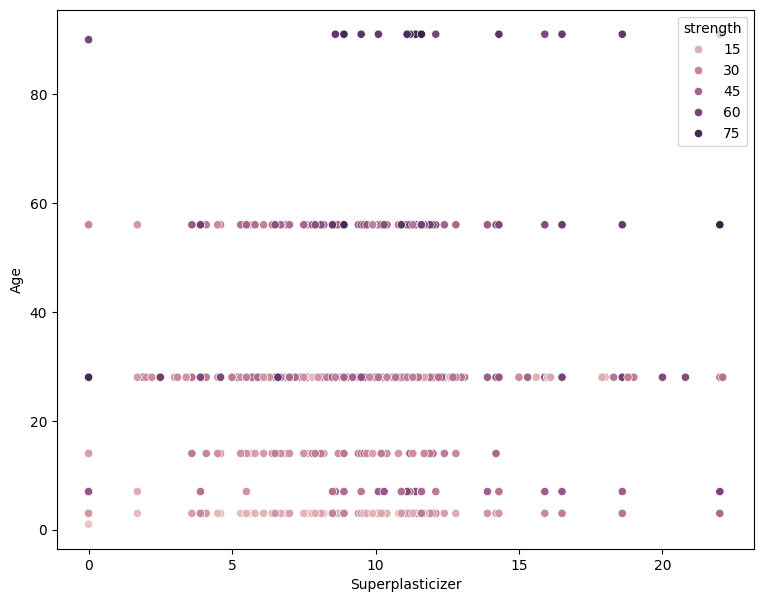

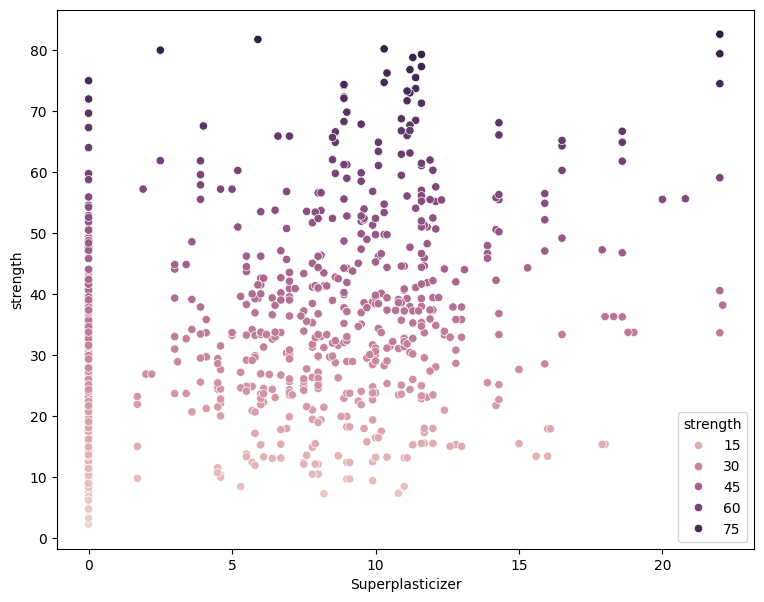

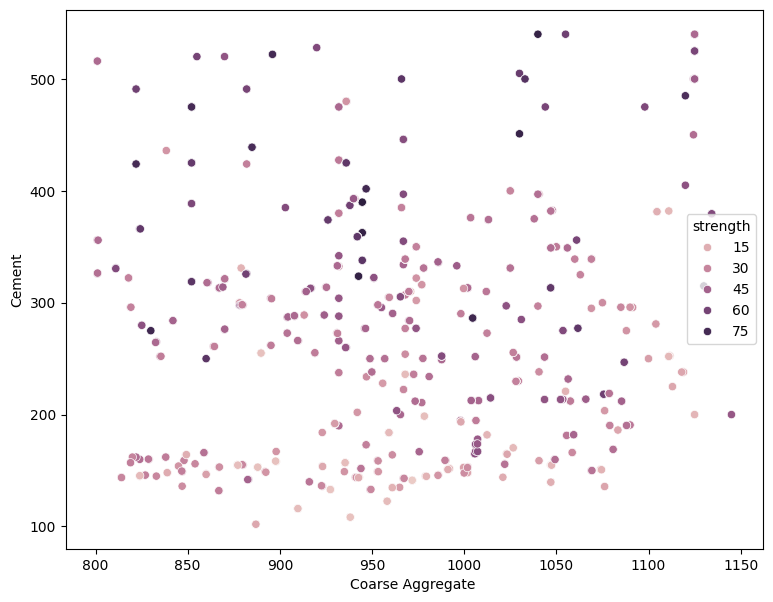

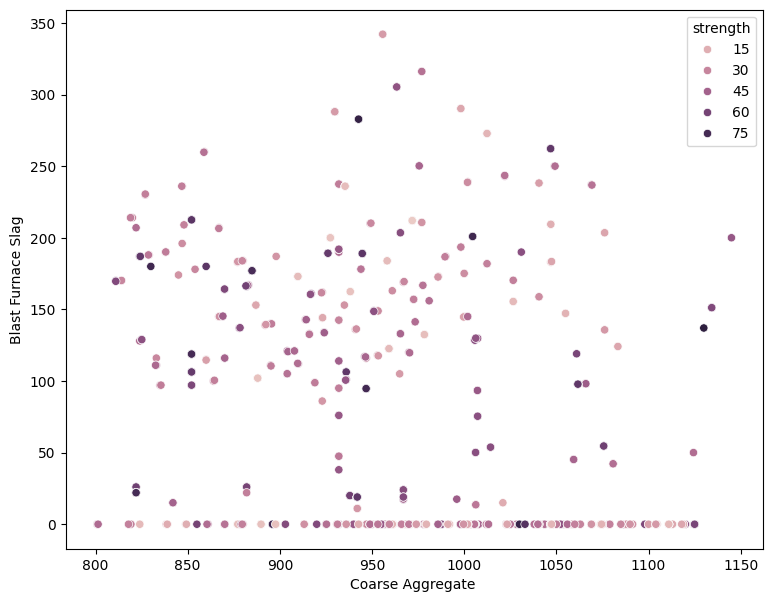

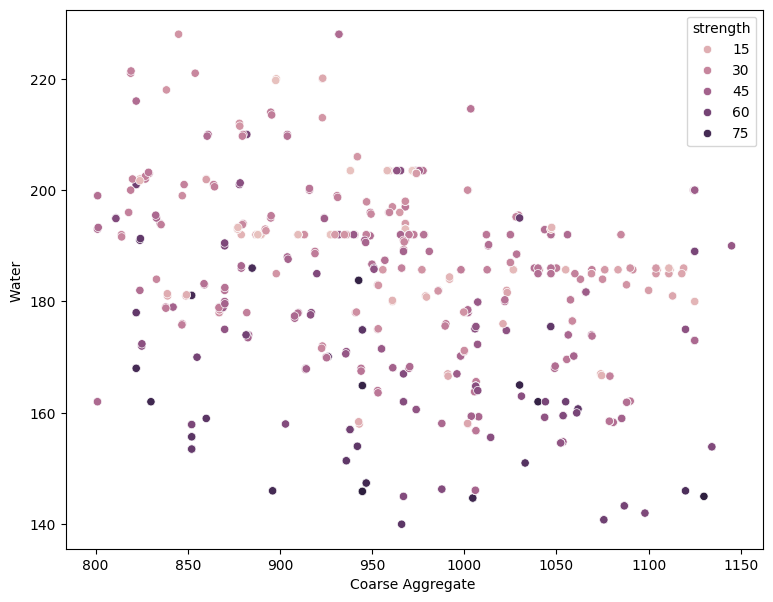

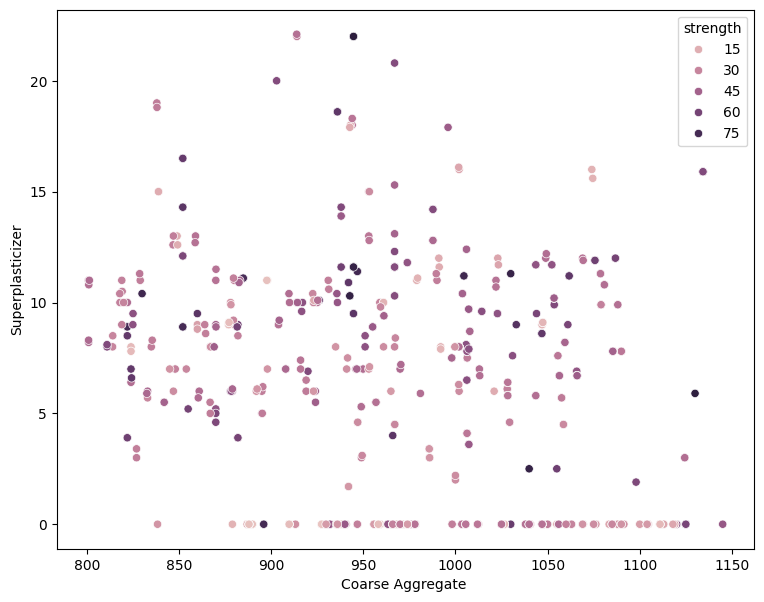

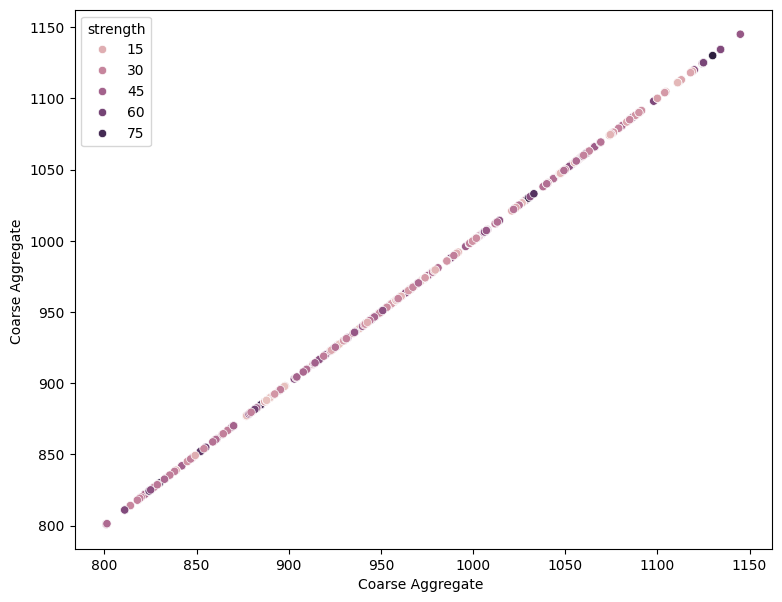

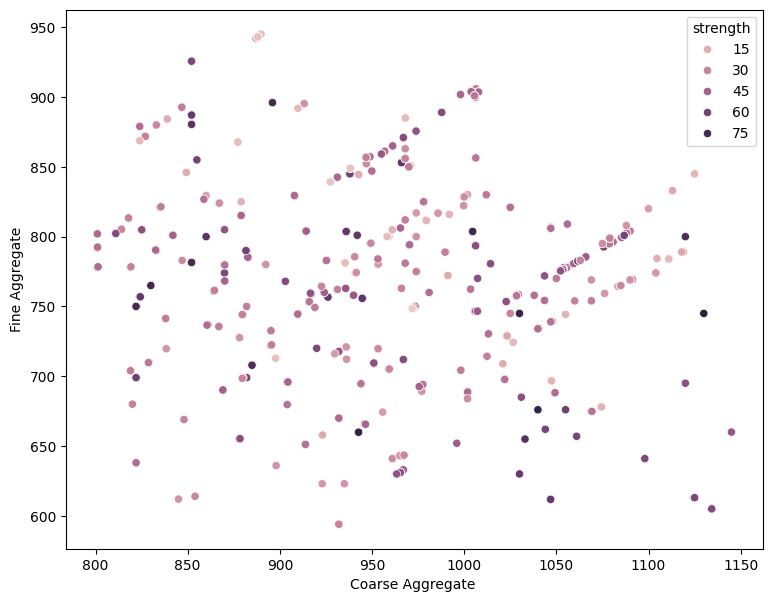

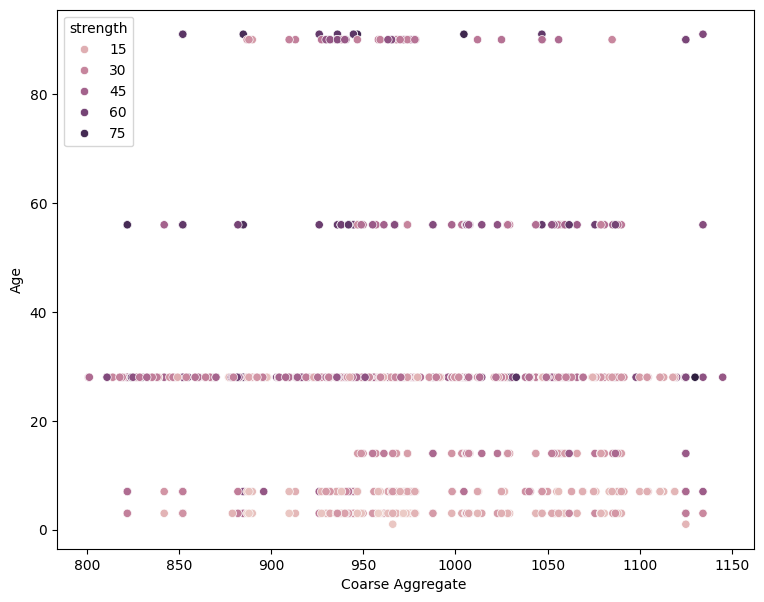

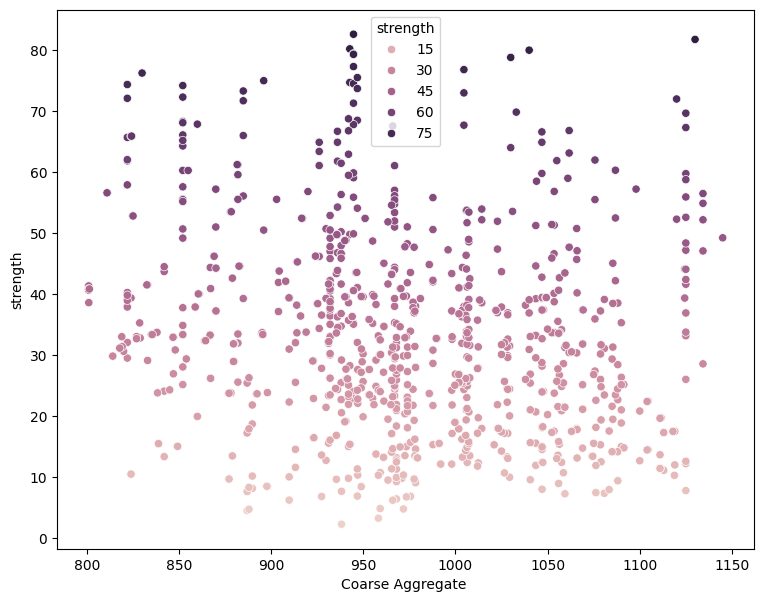

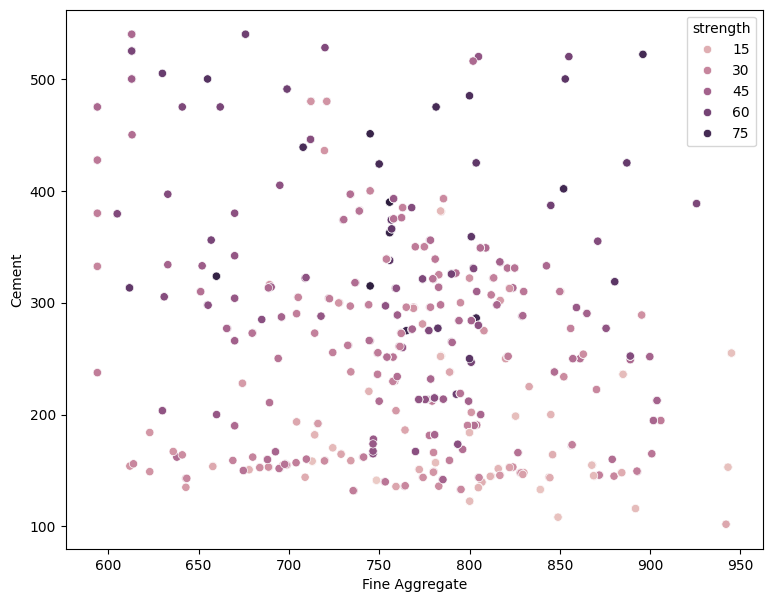

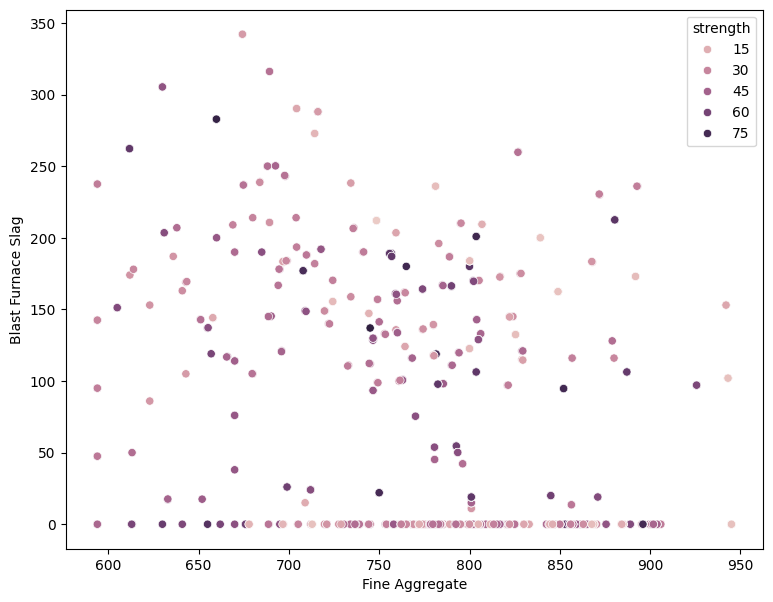

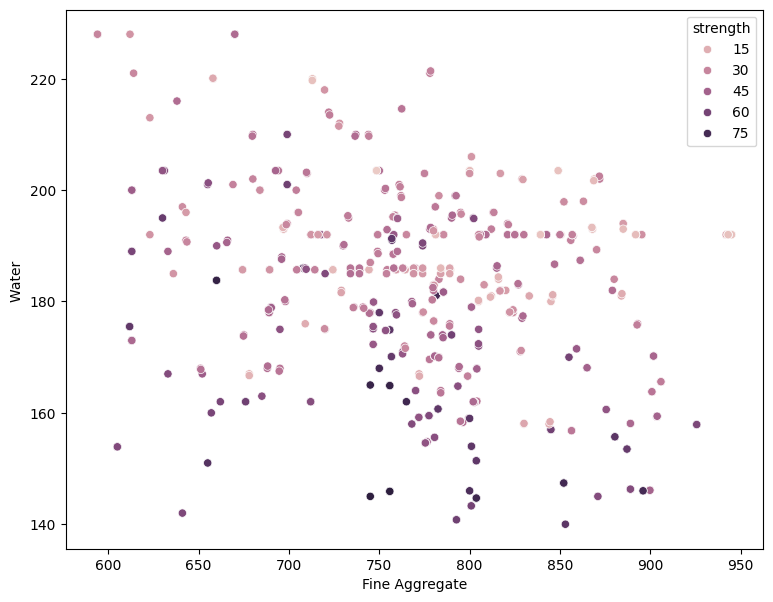

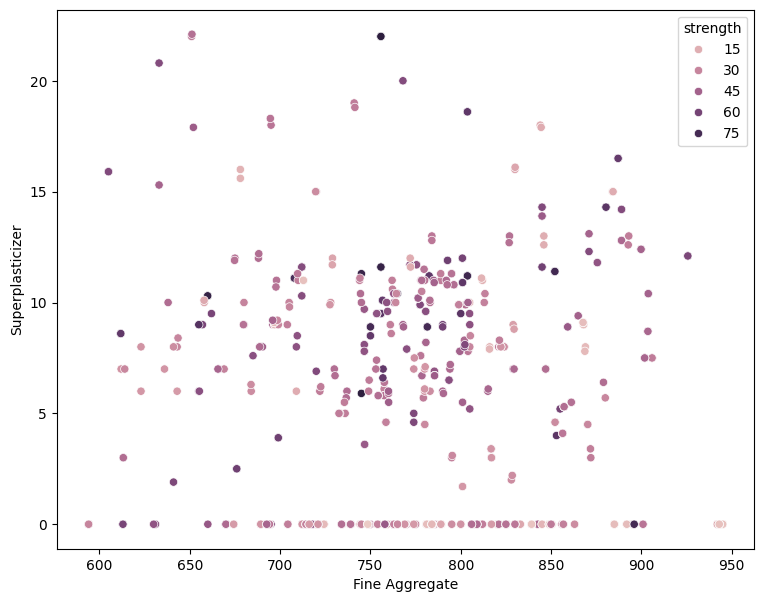

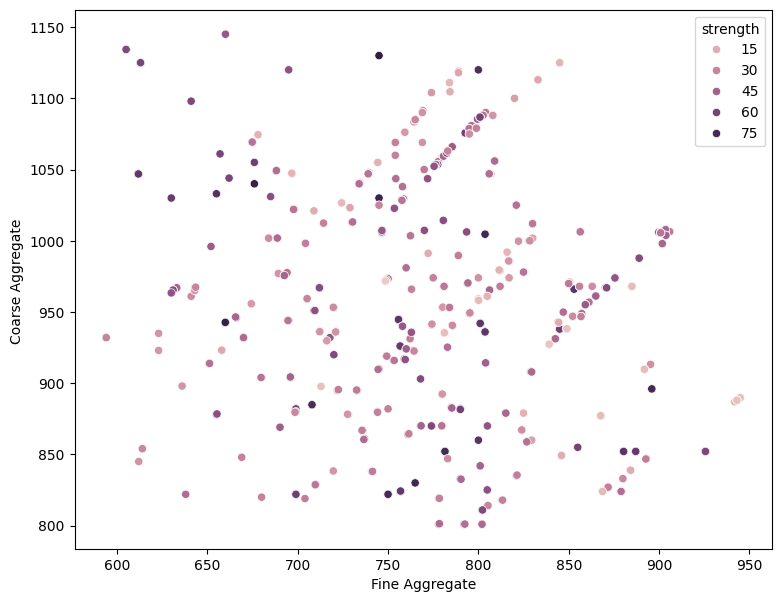

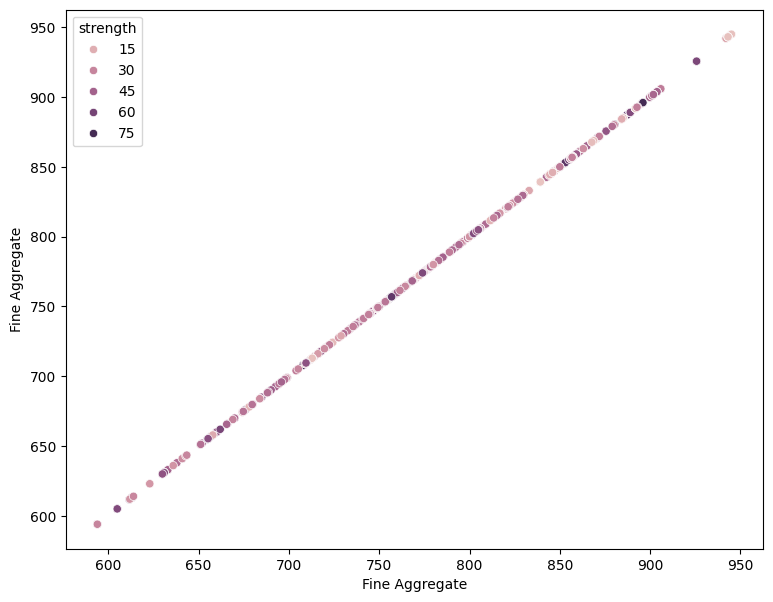

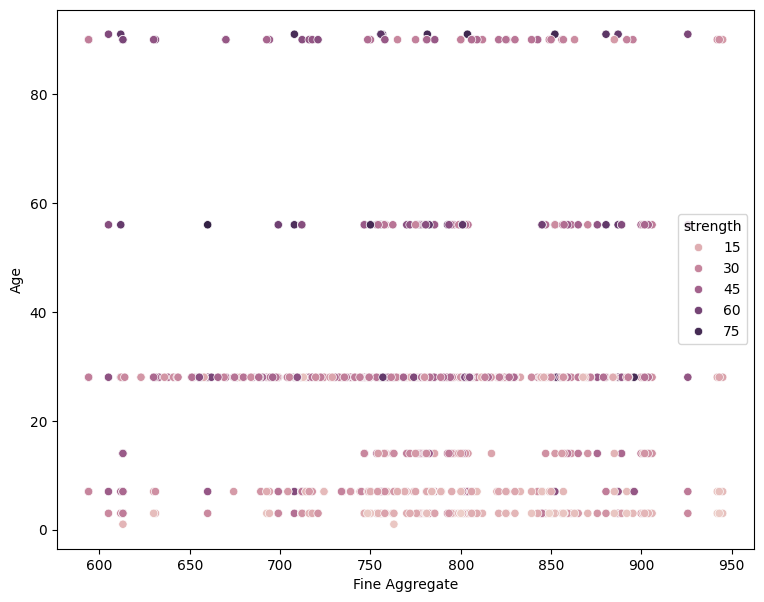

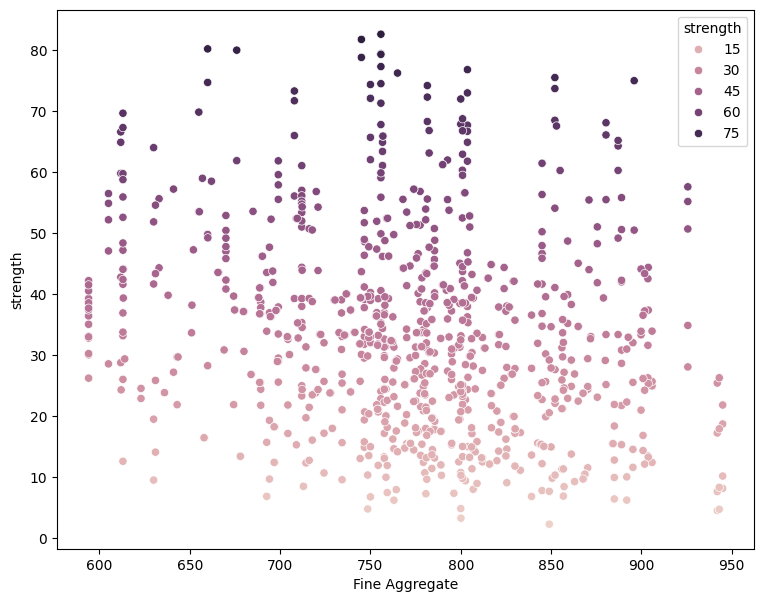

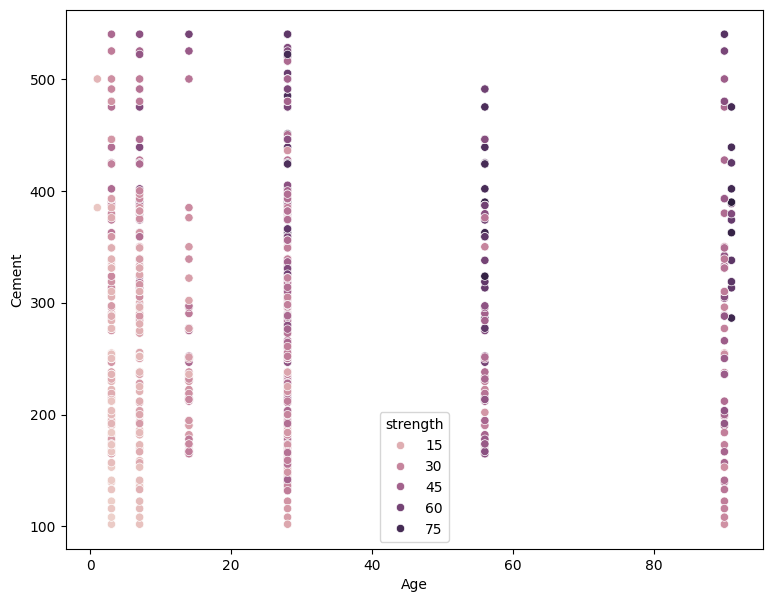

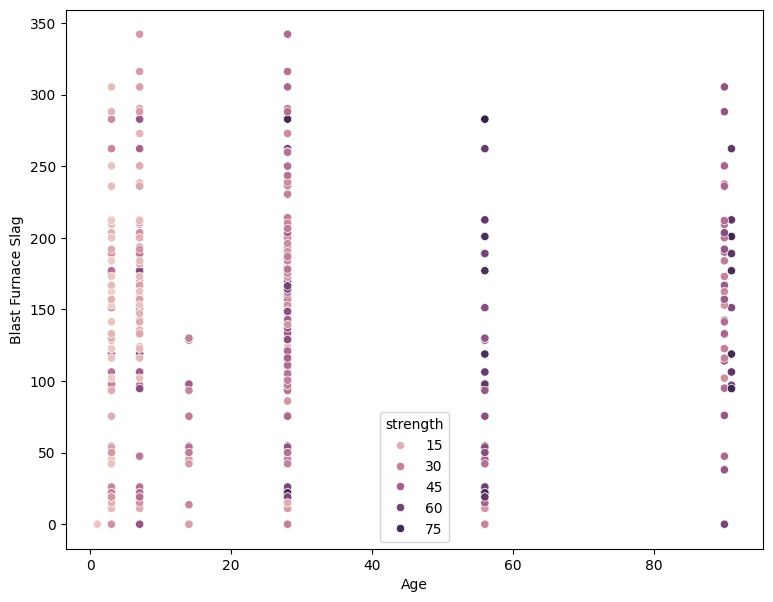

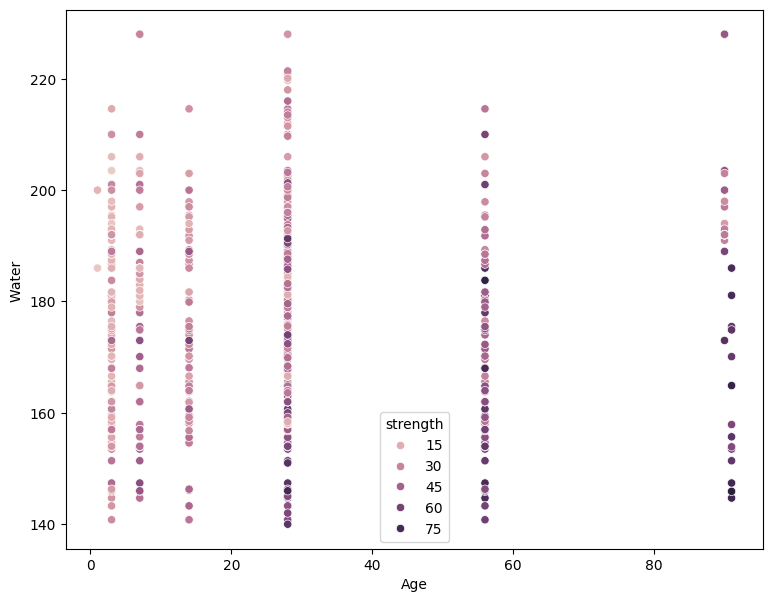

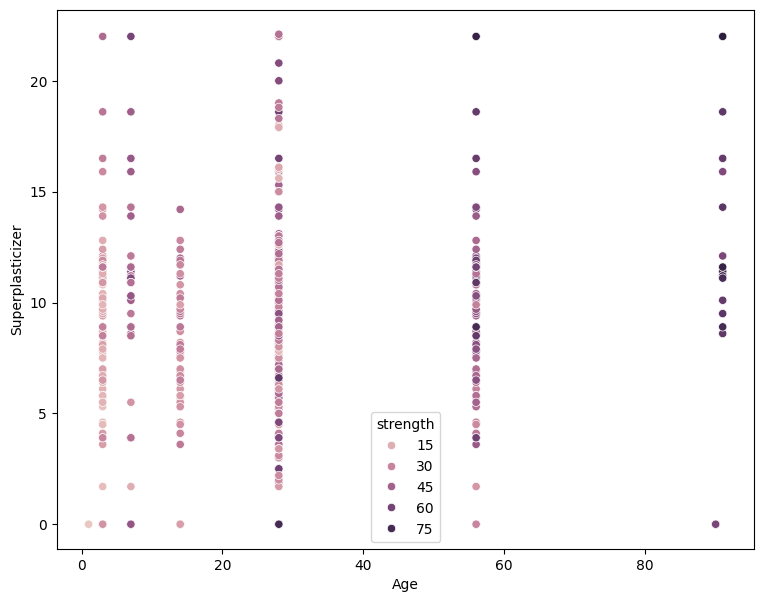

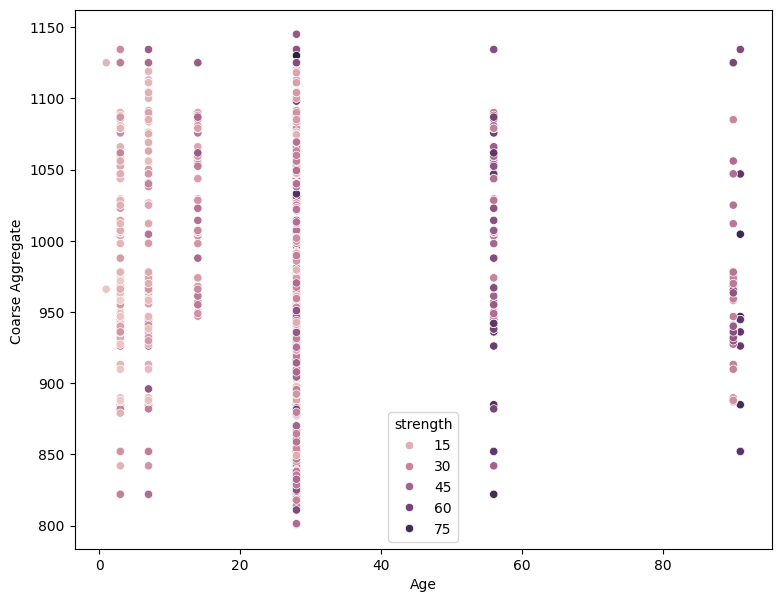

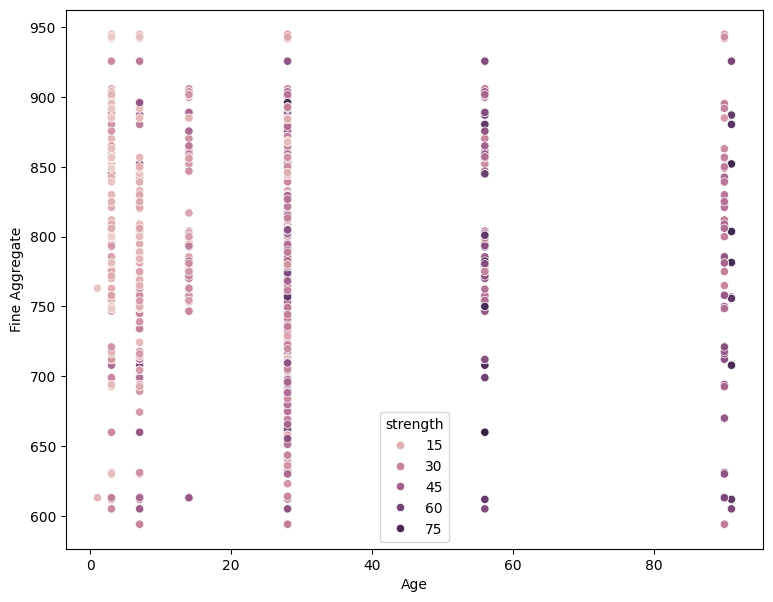

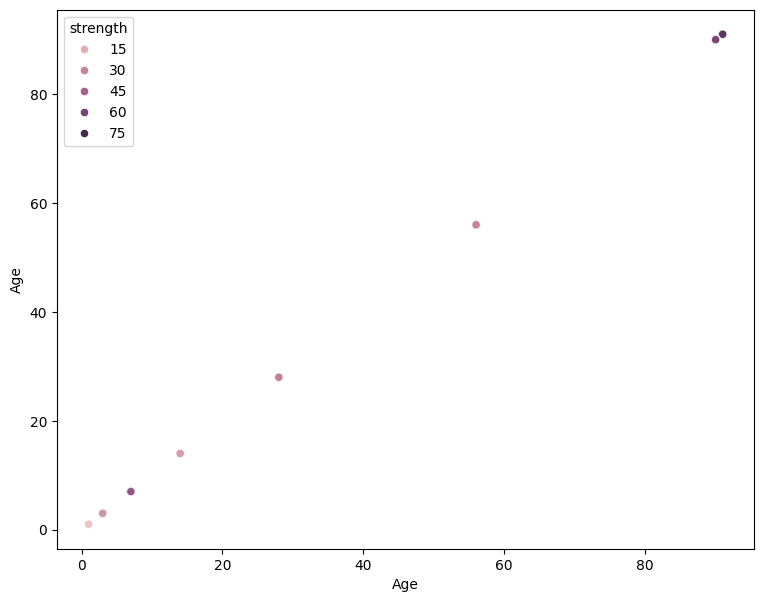

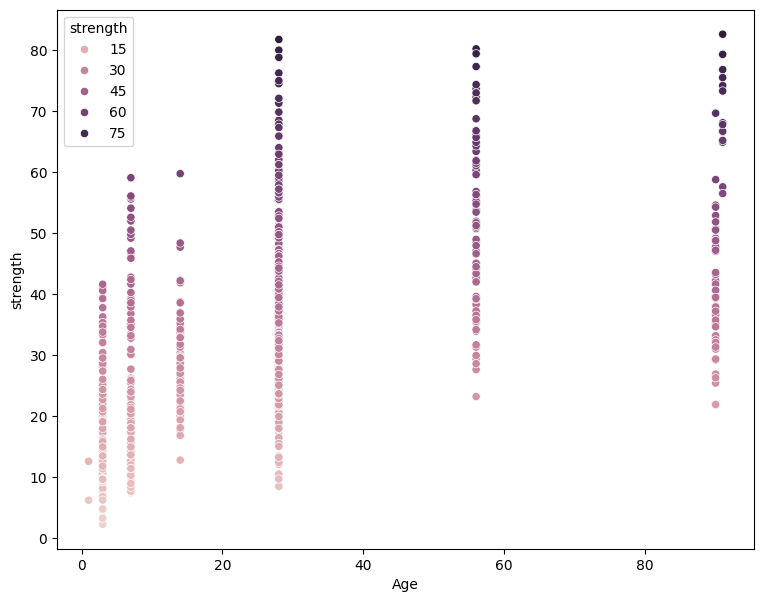

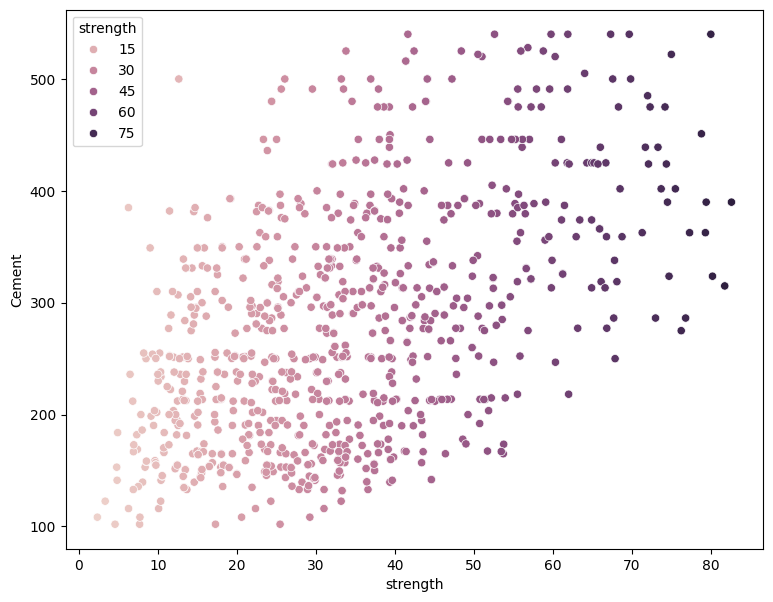

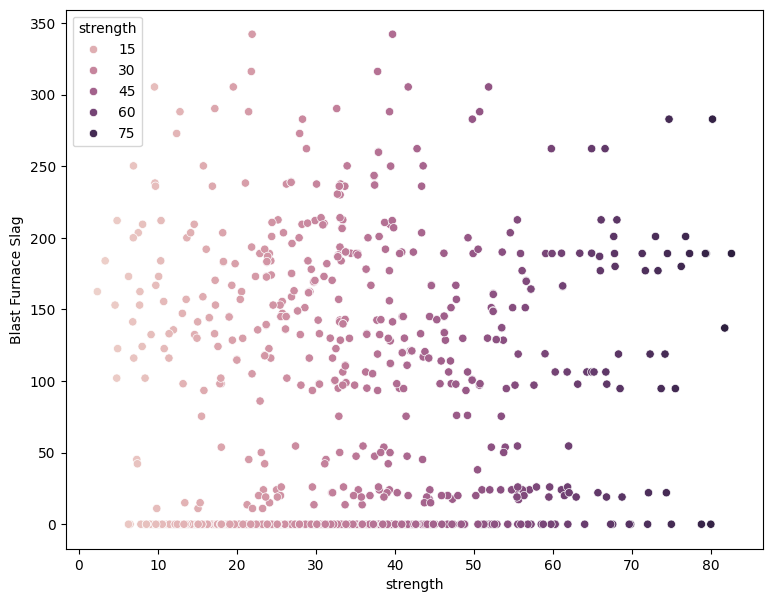

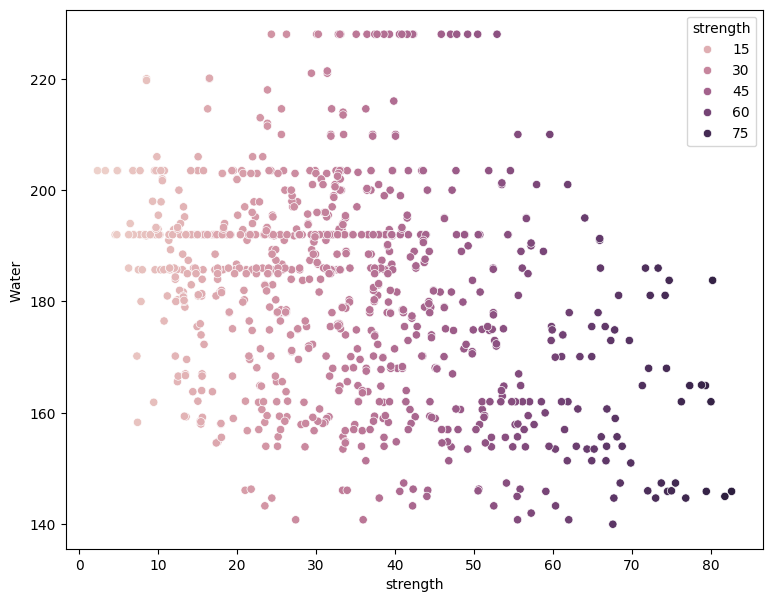

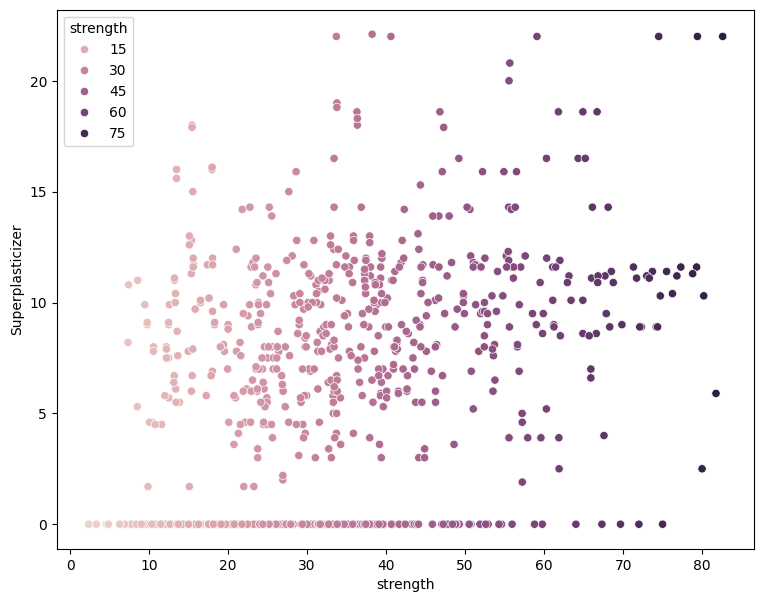

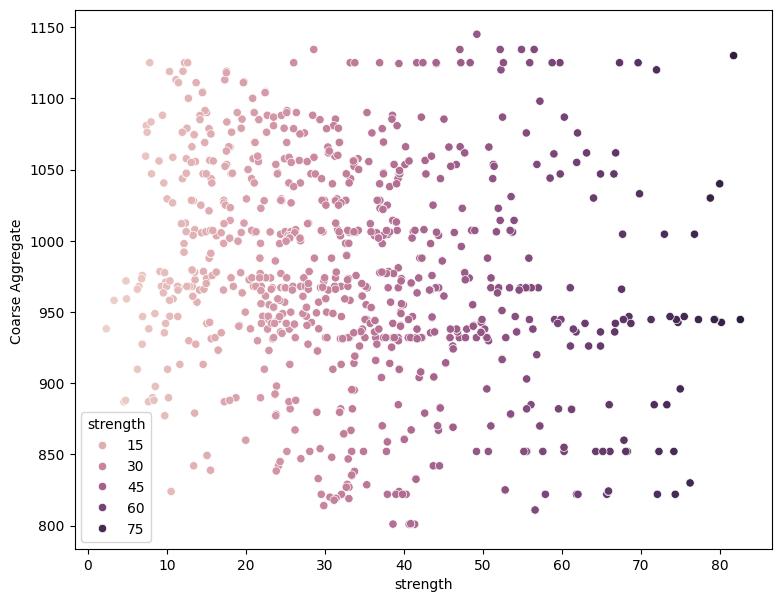

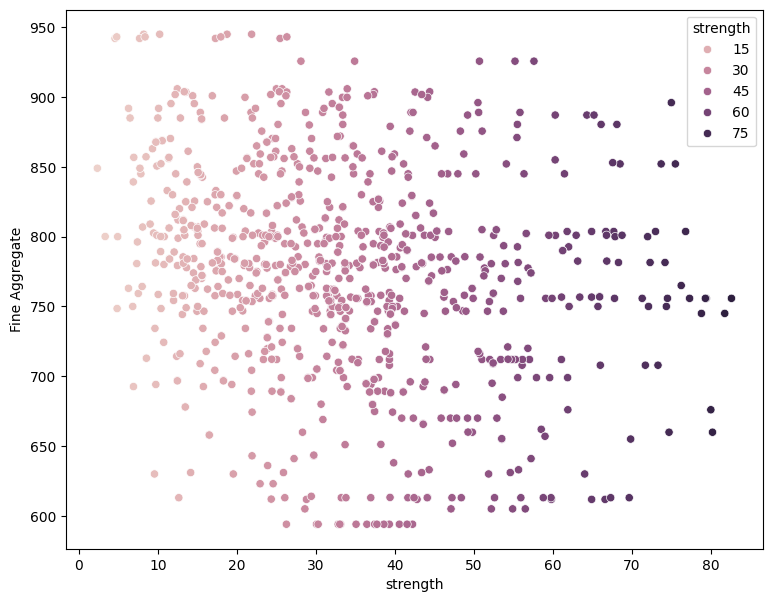

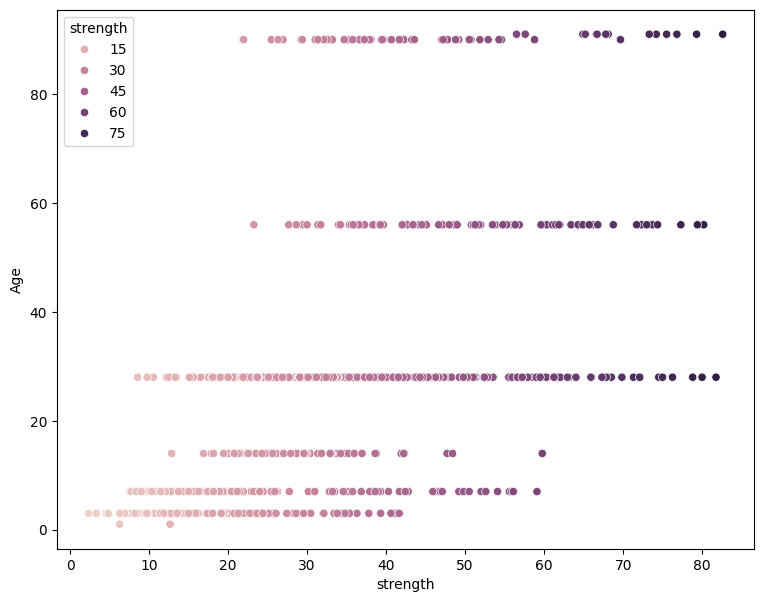

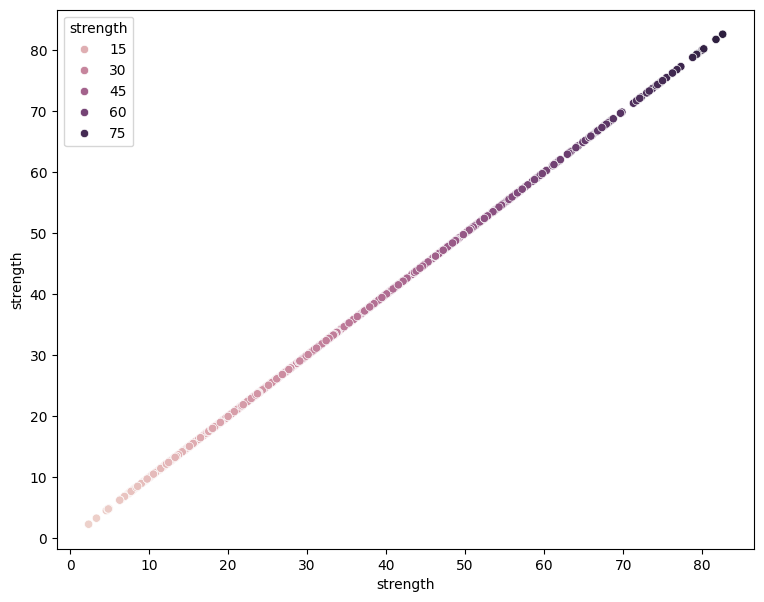

In [ ]:
for i in df.columns:
    for j in df.columns:
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=i,y=j,hue='strength',data=df)
        plt.show()

#Separate features and target coloms

In [ ]:
x = df.drop(['strength'],axis=1)
y = df['strength']

Scaling the data

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaler = scaler.fit_transform(x)

In [ ]:
x_scaler_frame=pd.DataFrame(x_scaler,columns=x.columns)
x_scaler_frame.head()

Cement  Blast Furnace Slag    Water   Superplasticizer  \
0  2.548622           -0.859049 -1.065371         -0.649890   
1  2.548622           -0.859049 -1.065371         -0.649890   
2 -0.097540            0.442638  2.491103         -1.116613   
3  1.003418            0.225690  2.491103         -1.116613   
4 -0.097540            0.442638  2.491103         -1.116613   

   Coarse Aggregate   Fine Aggregate       Age  
0           0.849236       -1.278543 -0.000744  
1           1.040929       -1.278543 -0.000744  
2          -0.530955       -1.357582  2.654687  
3          -0.530955       -2.358750 -0.000744  
4          -0.530955       -1.357582 -0.000744

#now see before scaling and after scaling our data graph

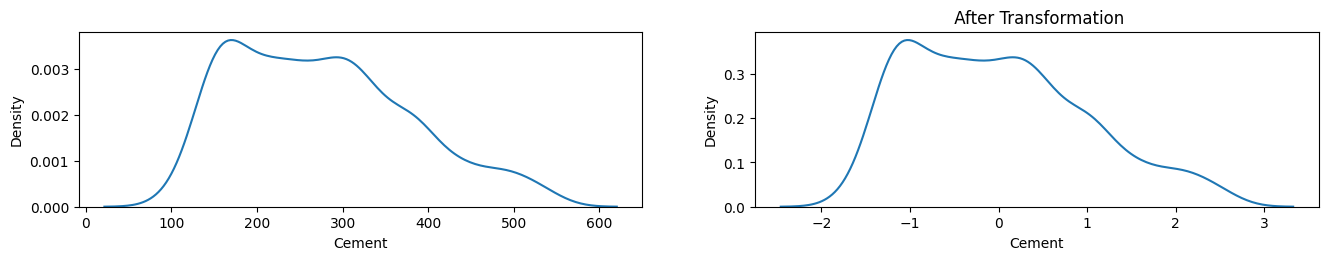

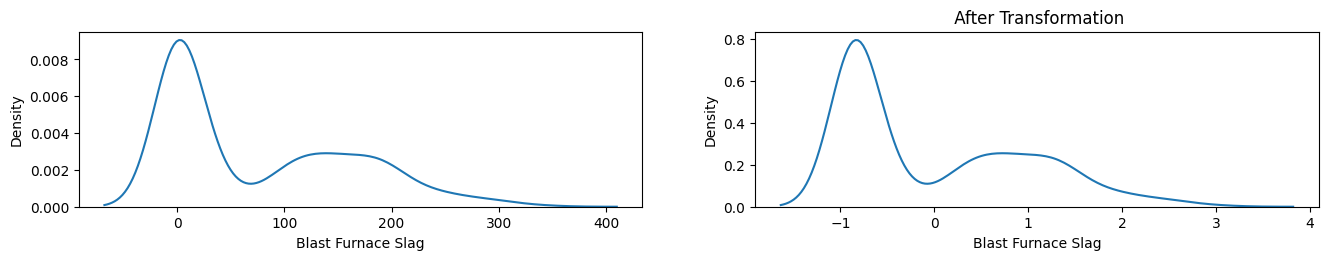

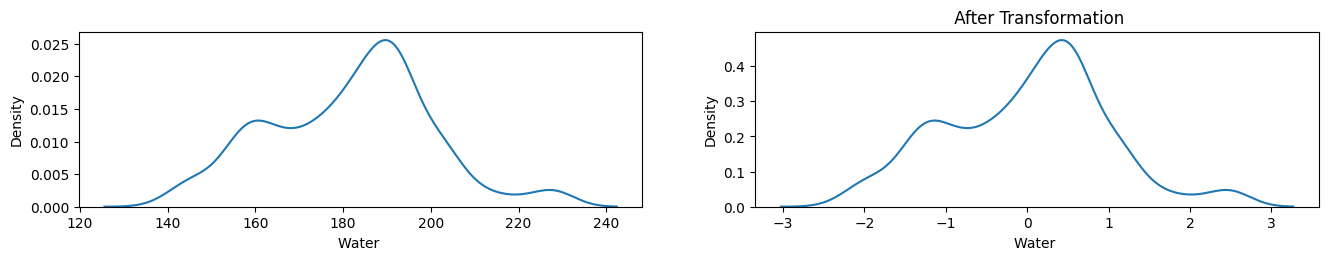

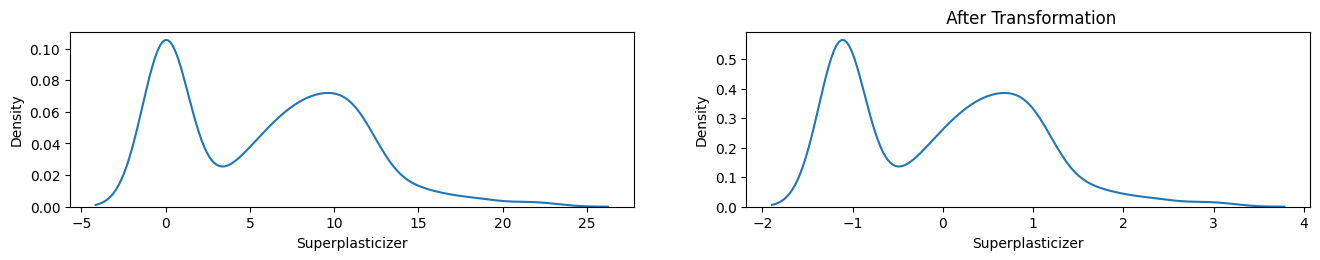

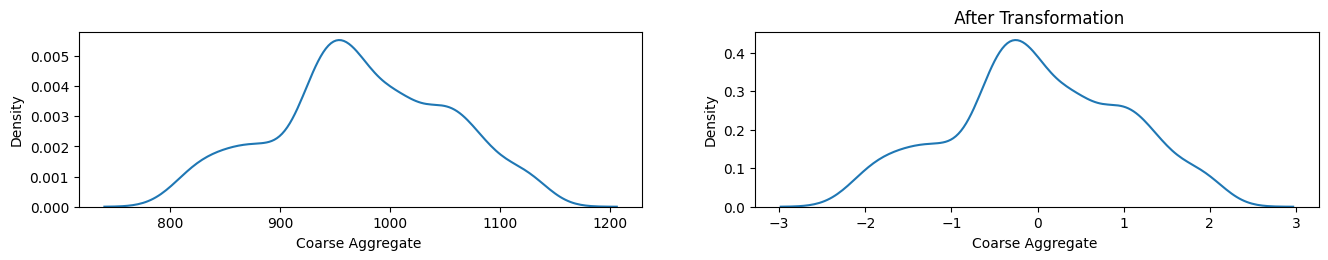

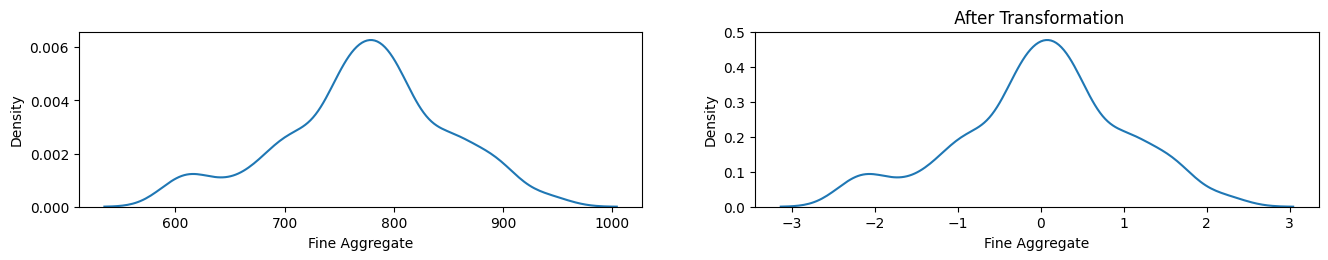

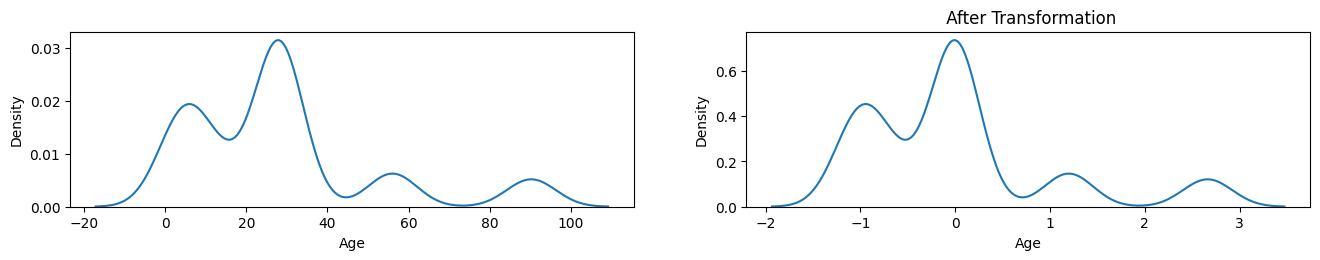

In [ ]:
for i in x.columns:
    plt.figure(figsize=(16,5))


    plt.subplot(2,2,3)
    sns.kdeplot(x=x[i])
    plt.subplot(2,2,4)
    sns.kdeplot(x=x_scaler_frame[i])
    plt.title(' After Transformation')

    plt.show( )

In [ ]:
x.skew()

Cement                0.528734
Blast Furnace Slag    0.755052
Water                 0.039502
Superplasticizer      0.369177
Coarse Aggregate     -0.063308
Fine Aggregate       -0.259392
Age                   1.356626
dtype: float64

In [ ]:
x_scaler_frame.skew()

Cement                0.528734
Blast Furnace Slag    0.755052
Water                 0.039502
Superplasticizer      0.369177
Coarse Aggregate     -0.063308
Fine Aggregate       -0.259392
Age                   1.356626
dtype: float64






***The skewness values confirms that after transformation our data has become normally distributed ***

#Preprocessing of Polynomial Features

Polynomial preprocessing is a technique used to transform input features into higher-degree polynomials, enabling models to capture nonlinear relationships in the data effectively.

In [ ]:
poly=PolynomialFeatures(degree=3)

In [ ]:
x_scaler_poly=poly.fit_transform(x_scaler)

In [ ]:
x_scaler_poly.shape

(864, 120)

#Split train and test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler_poly,y,test_size=0.2,random_state=2)

In [ ]:
x.shape,x_train.shape,x_test.shape

((864, 7), (691, 120), (173, 120))

#Model Implementation

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

y_test_pred_lr = lr.predict(x_test)
y_train_pred_lr = lr.predict(x_train)

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_test_pred_rf = rf.predict(x_test)
y_train_pred_rf = rf.predict(x_train)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_test_pred_gbr = gbr.predict(x_test)
y_train_pred_gbr = gbr.predict(x_train)


#visualizations: x_test_predicted and x_test_original

<ipython-input-32-a60f4a961ddf>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred_lr, label="LR y_test_Predicted")
<ipython-input-32-a60f4a961ddf>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Real")
<ipython-input-32-a60f4a961ddf>:15: UserWarning: 

`distplot` is a

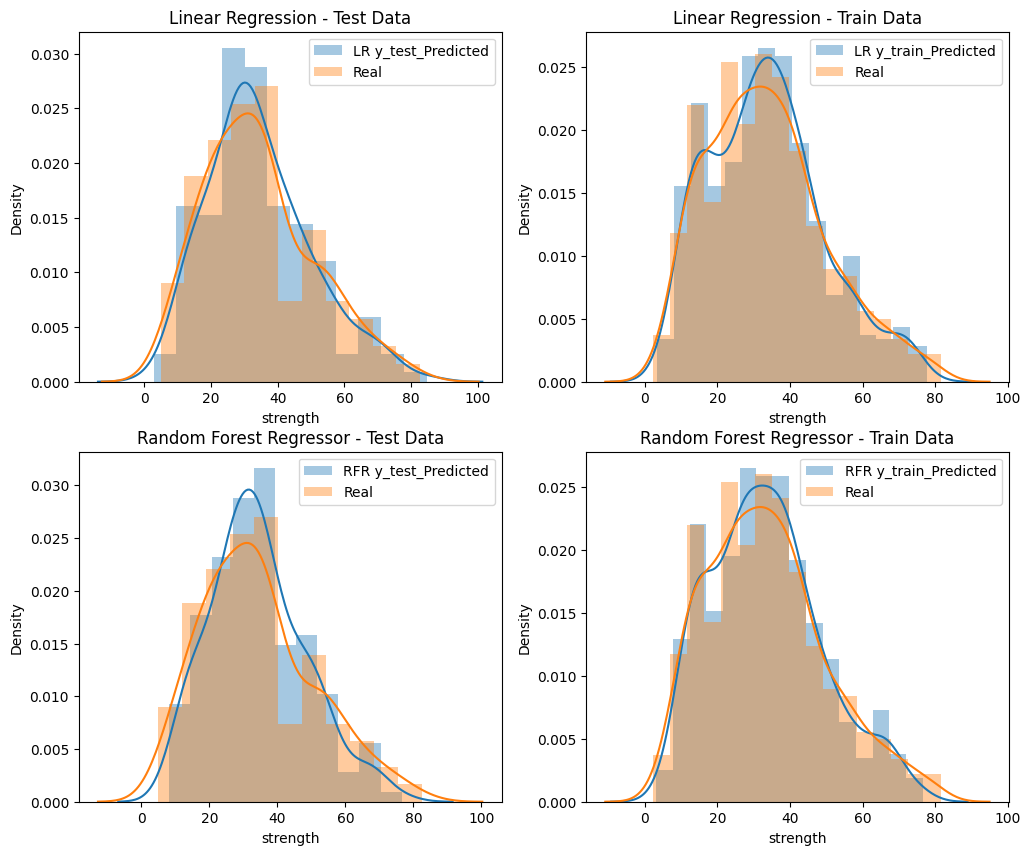

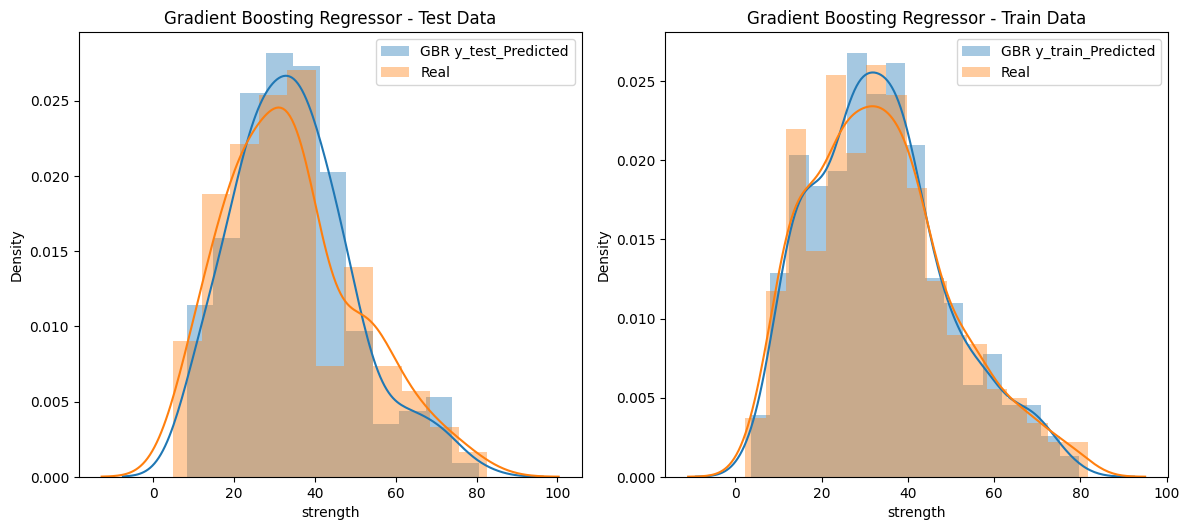

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
plt.figure(figsize=(12, 10))

# Linear Regression
plt.subplot(2, 2, 1)
sns.distplot(y_test_pred_lr, label="LR y_test_Predicted")
sns.distplot(y_test, label="Real")
plt.legend()
plt.title('Linear Regression - Test Data')

plt.subplot(2, 2, 2)
sns.distplot(y_train_pred_lr, label="LR y_train_Predicted")
sns.distplot(y_train, label="Real")
plt.legend()
plt.title('Linear Regression - Train Data')

# Random Forest Regressor
plt.subplot(2, 2, 3)
sns.distplot(y_test_pred_rf, label="RFR y_test_Predicted")
sns.distplot(y_test, label="Real")
plt.legend()
plt.title('Random Forest Regressor - Test Data')

plt.subplot(2, 2, 4)
sns.distplot(y_train_pred_rf, label="RFR y_train_Predicted")
sns.distplot(y_train, label="Real")
plt.legend()
plt.title('Random Forest Regressor - Train Data')

# Gradient Boosting Regressor
plt.figure(figsize=(12, 10))  # Start a new figure for GBR plots

plt.subplot(2, 2, 1)
sns.distplot(y_test_pred_gbr, label="GBR y_test_Predicted")
sns.distplot(y_test, label="Real")
plt.legend()
plt.title('Gradient Boosting Regressor - Test Data')

plt.subplot(2, 2, 2)
sns.distplot(y_train_pred_gbr, label="GBR y_train_Predicted")
sns.distplot(y_train, label="Real")
plt.legend()
plt.title('Gradient Boosting Regressor - Train Data')

# Display all plots
plt.tight_layout()
plt.show()


#Mean Absolute Error (MAE)

In [ ]:
lr_mae = mean_absolute_error(y_test, y_test_pred_lr)
rf_mae = mean_absolute_error(y_test, y_test_pred_rf)
gbr_mae = mean_absolute_error(y_test, y_test_pred_gbr)

print(f"Linear Regression MAE: {lr_mae}")
print(f"Random Forest Regressor MAE: {rf_mae}")
print(f"Gradient Boosting Regressor MAE: {gbr_mae}")


Linear Regression MAE: 4.287342236276816
Random Forest Regressor MAE: 4.165422427745664
Gradient Boosting Regressor MAE: 3.9070990675626427


#Mean Squared Error (MSE)

In [ ]:
lr_mse = mean_squared_error(y_test, y_test_pred_lr)
rf_mse = mean_squared_error(y_test, y_test_pred_rf)
gbr_mse = mean_squared_error(y_test, y_test_pred_gbr)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Random Forest Regressor MSE: {rf_mse}")
print(f"Gradient Boosting Regressor MSE: {gbr_mse}")


Linear Regression MSE: 34.883347451668755
Random Forest Regressor MSE: 33.231332491609656
Gradient Boosting Regressor MSE: 29.27675078720237


#Root Mean Squared Error (RMSE)

In [ ]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
rf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr))

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Random Forest Regressor RMSE: {rf_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")


Linear Regression RMSE: 5.906212614837766
Random Forest Regressor RMSE: 5.764662391815296
Gradient Boosting Regressor RMSE: 5.410799459155955


#R-squared score

In [ ]:
lr_score = lr.score(x_test, y_test)
rf_score = rf.score(x_test, y_test)
gbr_score = gbr.score(x_test, y_test)

print(f"Linear Regression R-squared score: {lr_score}")
print(f"Random Forest Regressor R-squared score: {rf_score}")
print(f"Gradient Boosting Regressor R-squared score: {gbr_score}")


Linear Regression R-squared score: 0.8716440817985192
Random Forest Regressor R-squared score: 0.8777227959292303
Gradient Boosting Regressor R-squared score: 0.8922739787385995


#The comparison of the three models

<Figure size 1400x800 with 0 Axes>

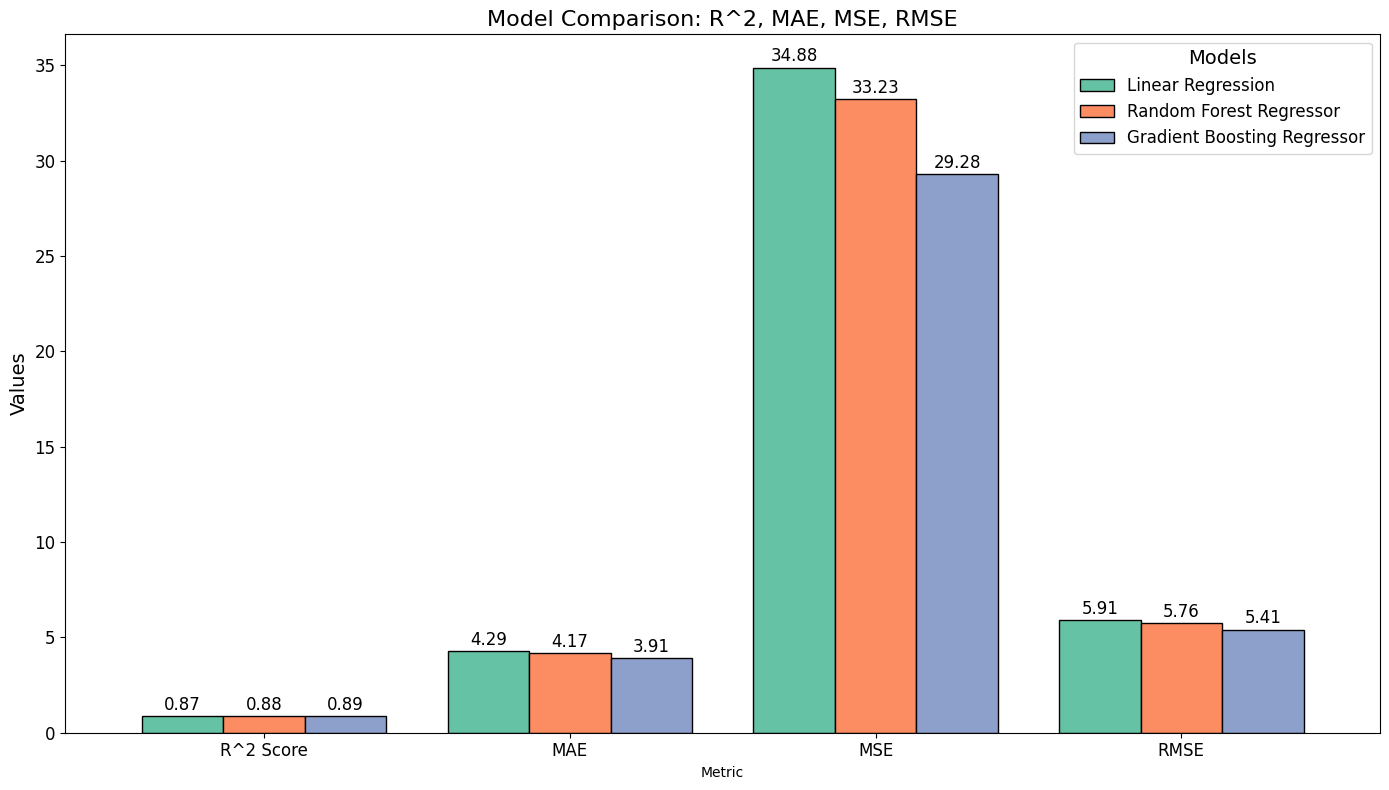

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for visualization
metrics = ['R^2 Score', 'MAE', 'MSE', 'RMSE']
lr_values = [lr_score, lr_mae, lr_mse, lr_rmse]
rf_values = [rf_score, rf_mae, rf_mse, rf_rmse]
gbr_values = [gbr_score, gbr_mae, gbr_mse, gbr_rmse]

# Combine all metrics into a DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Linear Regression': lr_values,
    'Random Forest Regressor': rf_values,
    'Gradient Boosting Regressor': gbr_values
})

# Set up the figure with a unique color palette
plt.figure(figsize=(14, 8))

# Plot with a more unique and attractive color palette
ax = comparison_df.set_index('Metric').plot(kind='bar', figsize=(14, 8),
                                             color=sns.color_palette("Set2"),
                                             width=0.8, edgecolor='black')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 8), textcoords='offset points')

# Customize plot
plt.title('Model Comparison: R^2, MAE, MSE, RMSE', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Add legend with titles and improve visibility
plt.legend(title='Models', fontsize=12, title_fontsize=14)

# Show plot
plt.show()


#Hyperparameter optimization using Grid Search



Initialized Hyperparameters

In [ ]:
# Define hyperparameters for Linear Regression
lr_params = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'copy_X': [True, False],  # Whether to copy X or overwrite it
    'n_jobs': [-1, None]  # Use all processors (-1) or default
}

# Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Define hyperparameters for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}


#Perform Grid Search for Decision Tree

In [ ]:
# Perform Grid Search for Decision Tree
lr_grid_search = GridSearchCV(estimator=LinearRegression(),
                              param_grid=lr_params, cv=5)
lr_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, None]})

In [ ]:
lr_grid_search.cv_results_

{'mean_fit_time': array([0.02499404, 0.07475505, 0.09647551, 0.07024884, 0.0288126 ,
        0.25184398, 0.43636365, 0.32850938]),
 'std_fit_time': array([0.00327215, 0.09739047, 0.13953249, 0.07089017, 0.00309537,
        0.39543641, 0.41343819, 0.35265158]),
 'mean_score_time': array([0.0081491 , 0.00682783, 0.00790596, 0.00682044, 0.00540628,
        0.00441003, 0.01087379, 0.00676036]),
 'std_score_time': array([0.0009974 , 0.00431029, 0.00157522, 0.00250874, 0.00223926,
        0.00195534, 0.00614482, 0.00439616]),
 'param_copy_X': masked_array(data=[True, True, True, True, False, False, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=True),
 'param_fit_intercept': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=True),
 'param_n_jobs': masked_array(data=[-1, None, -1, None, -1, None, -1, None],
      

In [ ]:
tuning_result_lr_gs = pd.DataFrame(lr_grid_search.cv_results_)
tuning_result_lr_gs.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_copy_X  \
0       0.024994      0.003272         0.008149        0.000997          True   
1       0.074755      0.097390         0.006828        0.004310          True   
2       0.096476      0.139532         0.007906        0.001575          True   
3       0.070249      0.070890         0.006820        0.002509          True   
4       0.028813      0.003095         0.005406        0.002239         False   

   param_fit_intercept param_n_jobs  \
0                 True           -1   
1                 True         None   
2                False           -1   
3                False         None   
4                 True           -1   

                                              params  split0_test_score  \
0  {'copy_X': True, 'fit_intercept': True, 'n_job...           0.826361   
1  {'copy_X': True, 'fit_intercept': True, 'n_job...           0.826361   
2  {'copy_X': True, 'fit_intercept': False, 'n_jo...           0.826361   
3  {'copy_X': True, 'fit_intercept': False, 'n_jo...           0.826361   
4  {'copy_X': False, 'fit_intercept': True, 'n_jo...           0.826361   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.850458           0.843991           0.872299           0.877615   
1           0.850458           0.843991           0.872299           0.877615   
2           0.850458           0.843991           0.872299           0.877615   
3           0.850458           0.843991           0.872299           0.877615   
4           0.850458           0.843991           0.872299           0.877615   

   mean_test_score  std_test_score  rank_test_score  
0         0.854145         0.01881                1  
1         0.854145         0.01881                1  
2         0.854145         0.01881                5  
3         0.854145         0.01881                5  
4         0.854145         0.01881                1

In [ ]:
tuning_result_lr_gs.shape

(8, 16)

In [ ]:
lr_grid_search.best_params_ #clf = lr_grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}

**Evaluate the optimized LR model for Grid Search**

In [ ]:

y_pred_lr_gs = lr_grid_search.predict(x_test)
lr_mae_gs= mean_absolute_error(y_test, y_pred_lr_gs)
lr_msc_gs= mean_squared_error(y_test, y_pred_lr_gs)
lr_score_gs= r2_score(y_test, y_pred_lr_gs)

print("\nLinear Regression Grid Search Performance:")
print("Mean Absolute Error:", lr_mae_gs)
print("Mean Squared Error:", lr_msc_gs)
print("R-squared:", lr_score_gs)



Linear Regression Grid Search Performance:
Mean Absolute Error: 4.287342236276816
Mean Squared Error: 34.883347451668755
R-squared: 0.8716440817985192


#Perform Grid Search for Random Forest

In [ ]:
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=rf_params, cv=5)
rf_grid_search.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
rf_grid_search.cv_results_

{'mean_fit_time': array([1.40795708e-03, 6.78920746e-04, 6.90793991e-04, 9.09566879e-04,
        7.27510452e-04, 7.52353668e-04, 7.60555267e-04, 7.08866119e-04,
        6.66046143e-04, 7.25317001e-04, 7.16352463e-04, 9.75227356e-04,
        7.02428818e-04, 7.48252869e-04, 6.81304932e-04, 5.67553663e-01,
        9.90265512e-01, 1.24649258e+00, 1.56705718e+00, 1.82907233e+00,
        4.86908340e-01, 7.34766626e-01, 1.22775574e+00, 1.22916708e+00,
        1.64965796e+00, 4.40854359e-01, 6.66599464e-01, 1.02981191e+00,
        1.11471114e+00, 1.46688299e+00, 3.99858665e-01, 6.07051611e-01,
        9.36096001e-01, 1.05548267e+00, 1.31373148e+00, 4.29752636e-01,
        5.38616323e-01, 8.18992662e-01, 1.11011910e+00, 1.08202205e+00,
        3.28612661e-01, 5.58346367e-01, 7.85655069e-01, 8.05026245e-01,
        1.11987934e+00, 1.20148659e-03, 1.95751190e-03, 1.17416382e-03,
        1.02066994e-03, 1.02496147e-03, 1.11002922e-03, 1.06635094e-03,
        1.06186867e-03, 1.08575821e-03, 1.11904

In [ ]:
tuning_result_rf_gs = pd.DataFrame(rf_grid_search.cv_results_)
tuning_result_rf_gs.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001408      0.001254              0.0             0.0   
1       0.000679      0.000027              0.0             0.0   
2       0.000691      0.000032              0.0             0.0   
3       0.000910      0.000158              0.0             0.0   
4       0.000728      0.000026              0.0             0.0   

   param_bootstrap param_max_depth param_max_features  \
0             True            None               auto   
1             True            None               auto   
2             True            None               auto   
3             True            None               auto   
4             True            None               auto   

   param_min_samples_split  param_n_estimators  \
0                        2                 100   
1                        2                 150   
2                        2                 200   
3                        2                 250   
4                        2                 300   

                                              params  split0_test_score  \
0  {'bootstrap': True, 'max_depth': None, 'max_fe...                NaN   
1  {'bootstrap': True, 'max_depth': None, 'max_fe...                NaN   
2  {'bootstrap': True, 'max_depth': None, 'max_fe...                NaN   
3  {'bootstrap': True, 'max_depth': None, 'max_fe...                NaN   
4  {'bootstrap': True, 'max_depth': None, 'max_fe...                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN              361  
1              NaN             NaN              361  
2              NaN             NaN              361  
3              NaN             NaN              361  
4              NaN             NaN              361

In [ ]:
tuning_result_rf_gs.shape

(540, 18)

In [ ]:
rf_grid_search.best_params_ #clf = rf_grid_search.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 200}

**Evaluate the optimized RF models for Grid Search**

In [ ]:

y_pred_rf_gs = rf_grid_search.predict(x_test)
rf_mae_gs= mean_absolute_error(y_test, y_pred_rf_gs)
rf_msc_gs= mean_squared_error(y_test, y_pred_rf_gs)
rf_score_gs= r2_score(y_test, y_pred_rf_gs)

print("\nLinear Regression Grid Search Performance:")
print("Mean Absolute Error:", rf_mae_gs)
print("Mean Squared Error:", rf_msc_gs)
print("R-squared:", rf_score_gs)



Linear Regression Grid Search Performance:
Mean Absolute Error: 3.6731298255293794
Mean Squared Error: 30.774000206865033
R-squared: 0.8867647361321179


#Perform Grid Search for GradientBoosting

In [ ]:
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=gb_params, cv=5)
gb_grid_search.fit(x_train, y_train)

In [ ]:
gb_grid_search.cv_results_

In [ ]:
tuning_result_gb_gs = pd.DataFrame(gb_grid_search.cv_results_)
tuning_result_gb_gs.head()

In [ ]:
tuning_result_gb_gs.shape

In [ ]:
gb_grid_search.best_params_ #clf = gb_grid_search.best_params_

**Evaluate the optimized GradientBoosting model for Grid Search**

In [ ]:

y_pred_gb_gs = gb_grid_search.predict(x_test)
gb_mae_gs= mean_absolute_error(y_test, y_pred_gb_gs)
gb_msc_gs= mean_squared_error(y_test, y_pred_gb_gs)
gb_score_gs= r2_score(y_test, y_pred_gb_gs)

print("\nLinear Regression Grid Search Performance:")
print("Mean Absolute Error:", lr_mae_gs)
print("Mean Squared Error:", lr_msc_gs)
print("R-squared:", lr_score_gs)


#Final Performance Comparison of LR, RF, GradientBoosting with Grid Search Optimization



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store model names
models = ["Linear Regression", "Random Forest", "Gradient Boosting"]

# Compute metrics
metrics = {
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr_gs),
        accuracy_score(y_test, y_pred_rf_gs),
        accuracy_score(y_test, y_pred_gb_gs)

    ],
    "Precision": [
        precision_score(y_test, y_pred_lr_gs),
        precision_score(y_test, y_pred_rf_gs),
        precision_score(y_test, y_pred_gb_gs)

    ],
    "Recall": [
        recall_score(y_test, y_pred_lr_gs),
        recall_score(y_test, y_pred_rf_gs),
        recall_score(y_test, y_pred_gb_gs)

    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr_gs),
        f1_score(y_test, y_pred_rf_gs),
        f1_score(y_test, y_pred_gb_gs)

    ]
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(metrics, index=models)

# Plot bar chart with explicit figure size adjustment
fig, ax = plt.subplots(figsize=(11, 6))  # Create a larger figure with width=14, height=10
df_metrics.plot(kind="bar", colormap="viridis", edgecolor="black", ax=ax)

# Title and labels
plt.title("Model Performance Comparison After Hyperparameter Tuning using Grid Search ", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Set grid, legend, and x-tick rotation
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show percentage values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()
